# Healthcare Insurance Analysis

## Problem statement:
A significant public health concern is the rising cost of healthcare. Therefore, it's crucial to be able to predict future costs and gain a solid understanding of their causes. The insurance industry must also take this analysis seriously. This analysis may be used by
healthcare insurance providers to make a variety of strategic and tactical decisions.

## Objective:
The objective of this project is to predict patients’ healthcare costs and to identify factors contributing to this prediction. It will also be useful to learn the interdependencies of different factors and comprehend the significance of various tools at various stages of
the healthcare cost prediction process.

## Project Task: Week 1
Data science/data analysis	
* 1.	Collate the files so that all the information is in one place
* 2.	Check for missing values in the dataset
* 3.	Find the percentage of rows that have trivial value (for example, ?), and delete such rows if they do not contain  significant information
* 4.	Use the necessary transformation methods to deal with the nominal and ordinal categorical variables in the dataset
* 5.	The dataset has State ID, which has around 16 states. All states are not represented in equal proportions in the data. Creating dummy variables for all regions may also result in too many insignificant predictors. Nevertheless, only R1011, R1012, and R1013 are worth investigating further. Create a suitable strategy to create dummy variables with these restraints.
* 6.	The variable NumberOfMajorSurgeries also appears to have string values. Apply a suitable method to clean up this variable.
  Note: Use Excel as well as Python to complete the tasks
* 7.	Age appears to be a significant factor in this analysis. Calculate the patients' ages based on their dates of birth.
* 8.	The gender of the patient may be an important factor in determining the cost of hospitalization. The salutations in a * beneficiary's name can be used to determine their gender. Make a new field for the beneficiary's gender.
* 9.	You should also visualize the distribution of costs using a histogram, box and whisker plot, and swarm plot.
* 10.	State how the distribution is different across gender and tiers of hospitals
* 11.	Create a radar chart to showcase the median hospitalization cost for each tier of hospitals
* 12.	Create a frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities and hospitals
* 13.	Test the following null hypotheses:
   * a.	The average hospitalization costs for the three types of hospitals are not significantly different
   * b.	The average hospitalization costs for the three types of cities are not significantly different
   * c.	The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers
   * d.	Smoking and heart issues are independent
     Note: Use Excel as well as Python to complete the tasks
 
## Project Task: Week 2
Machine Learning	
* 1.	Examine the correlation between predictors to identify highly correlated predictors. Use a heatmap to visualize this.
* 2.	Develop and evaluate the final model using regression with a stochastic gradient descent optimizer. Also, ensure that you apply all the following suggestions:
    Note:
   •	Perform the stratified 5-fold cross-validation technique for model building and validation
   •	Use standardization and hyperparameter tuning effectively
   •	Use sklearn-pipelines
   •	Use appropriate regularization techniques to address the bias-variance trade-off
   * a.	Create five folds in the data, and introduce a variable to identify the folds
   * b.	For each fold, run a for loop and ensure that 80 percent of the data is used to train the model and the remaining 20 percent is used to validate it in each iteration
   * c.	Develop five distinct models and five distinct validation scores (root mean squared error values)
   * d.	Determine the variable importance scores, and identify the redundant variables
* 3.	Use random forest and extreme gradient boosting for cost prediction, share your cross- validation results, and calculate the variable importance scores
* 4.	Case scenario: Estimate the cost of hospitalization for Christopher, Ms. Jayna (her date of birth is 12/28/1988, height is 170 cm, and weight is 85 kgs). She lives in a tier-1 city and her state’s State ID is R1011. She lives with her partner and two children. She was found to be nondiabetic (HbA1c = 5.8). She smokes but is otherwise healthy. She has had no transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be estimated using tier-1 hospitals.
* 5.	Find the predicted hospitalization cost using all five models. The predicted value should be the mean of the five models' predicted values.


# Week 1
## 1. Collate the files so that all the information is in one place

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
hospitalisation = pd.read_csv('Hospitalisation details.csv')
medical = pd.read_csv('Medical Examinations.csv')
names = pd.read_excel('Names.xlsx')

In [3]:
hospitalisation.head()

Customer ID  year month  date  children  charges Hospital tier City tier  \
0      Id2335  1992   Jul     9         0   563.84      tier - 2  tier - 3   
1      Id2334  1992   Nov    30         0   570.62      tier - 2  tier - 1   
2      Id2333  1993   Jun    30         0   600.00      tier - 2  tier - 1   
3      Id2332  1992   Sep    13         0   604.54      tier - 3  tier - 3   
4      Id2331  1998   Jul    27         0   637.26      tier - 3  tier - 3   

  State ID  
0    R1013  
1    R1013  
2    R1013  
3    R1013  
4    R1013

In [4]:
hospitalisation.shape

(2343, 9)

In [5]:
hospitalisation['Customer ID'].value_counts()

?         6
Id2335    1
Id774     1
Id780     1
Id779     1
         ..
Id1555    1
Id1554    1
Id1553    1
Id1552    1
Id1       1
Name: Customer ID, Length: 2338, dtype: int64

In [6]:
hospitalisation.sort_values("Customer ID")

Customer ID  year month  date  children   charges Hospital tier  \
294            ?  1999   Jun     9         1   2775.19      tier - 2   
731            ?  1985   Dec    20         2   6203.90      tier - 1   
45             ?  2004   Nov     6         0   1137.01      tier - 3   
2129           ?  2000   Oct    13         0  35585.58      tier - 1   
2158           ?  1992   Oct     6         0  36837.47      tier - 1   
...          ...   ...   ...   ...       ...       ...           ...   
1341       Id997  1969   Oct    11         3  11264.54      tier - 3   
1340       Id998  1981   Oct     2         1  11255.29      tier - 3   
1339       Id999  1969   Aug    20         3  11253.42      tier - 3   
1863      id2444  1987   Nov    27         2  20984.09      tier - 2   
2098      id3444  2004   Nov     1         2  34303.17      tier - 1   

     City tier State ID  
294   tier - 1    R1012  
731   tier - 2    R1012  
45    tier - 1    R1013  
2129  tier - 2    R1011  
2158  tier - 2    R1011  
...        ...      ...  
1341  tier - 2    R1011  
1340  tier - 1    R1026  
1339  tier - 1    R1011  
1863  tier - 2    R1015  
2098  tier - 3    R1013  

[2343 rows x 9 columns]

In [7]:
hospitalisation = hospitalisation.sort_values("Customer ID")

In [8]:
hospitalisation.head()

Customer ID  year month  date  children   charges Hospital tier  \
294            ?  1999   Jun     9         1   2775.19      tier - 2   
731            ?  1985   Dec    20         2   6203.90      tier - 1   
45             ?  2004   Nov     6         0   1137.01      tier - 3   
2129           ?  2000   Oct    13         0  35585.58      tier - 1   
2158           ?  1992   Oct     6         0  36837.47      tier - 1   

     City tier State ID  
294   tier - 1    R1012  
731   tier - 2    R1012  
45    tier - 1    R1013  
2129  tier - 2    R1011  
2158  tier - 2    R1011

In [9]:
hospitalisation['Customer ID'] = hospitalisation['Customer ID'].str.upper()
hospitalisation.head(10)

Customer ID  year month  date  children   charges Hospital tier  \
294            ?  1999   Jun     9         1   2775.19      tier - 2   
731            ?  1985   Dec    20         2   6203.90      tier - 1   
45             ?  2004   Nov     6         0   1137.01      tier - 3   
2129           ?  2000   Oct    13         0  35585.58      tier - 1   
2158           ?  1992   Oct     6         0  36837.47      tier - 1   
2202           ?  1991   Nov    22         2  38711.00      tier - 1   
2342         ID1  1968   Oct    12         0  63770.43      tier - 1   
2333        ID10  1978   Dec    29         0  48885.14      tier - 1   
2243       ID100  1977   Jun    27         2  40284.38      tier - 1   
1338      ID1000  1989   Dec    17         3  11250.43      tier - 3   

     City tier State ID  
294   tier - 1    R1012  
731   tier - 2    R1012  
45    tier - 1    R1013  
2129  tier - 2    R1011  
2158  tier - 2    R1011  
2202  tier - 3    R1011  
2342  tier - 3    R1013  
2333  tier - 2    R1013  
2243  tier - 3    R1012  
1338  tier - 2    R1026

In [10]:
medical.head()

Customer ID     BMI  HBA1C Heart Issues Any Transplants Cancer history  \
0         Id1  47.410   7.47           No              No             No   
1         Id2  30.360   5.77           No              No             No   
2         Id3  34.485  11.87          yes              No             No   
3         Id4  38.095   6.05           No              No             No   
4         Id5  35.530   5.45           No              No             No   

  NumberOfMajorSurgeries smoker  
0       No major surgery    yes  
1       No major surgery    yes  
2                      2    yes  
3       No major surgery    yes  
4       No major surgery    yes

In [11]:
medical['Customer ID'] = medical['Customer ID'].str.upper()
medical.head(10)

Customer ID     BMI  HBA1C Heart Issues Any Transplants Cancer history  \
0         ID1  47.410   7.47           No              No             No   
1         ID2  30.360   5.77           No              No             No   
2         ID3  34.485  11.87          yes              No             No   
3         ID4  38.095   6.05           No              No             No   
4         ID5  35.530   5.45           No              No             No   
5         ID6  32.800   6.59           No              No             No   
6         ID7  36.400   6.07           No              No             No   
7         ID8  36.960   7.93           No              No             No   
8         ID9  41.140   9.58          yes              No            Yes   
9        ID10  38.060  10.79           No              No             No   

  NumberOfMajorSurgeries smoker  
0       No major surgery    yes  
1       No major surgery    yes  
2                      2    yes  
3       No major surgery    yes  
4       No major surgery    yes  
5       No major surgery    yes  
6       No major surgery    yes  
7                      3    yes  
8                      1    yes  
9       No major surgery    yes

In [12]:
names.head()

Customer ID                    name
0         Id1       Hawks, Ms.  Kelly
1         Id2  Lehner, Mr.  Matthew D
2         Id3           Lu, Mr.  Phil
3         Id4    Osborne, Ms.  Kelsey
4         Id5    Kadala, Ms.  Kristyn

In [13]:
names['Customer ID'] = names['Customer ID'].str.upper()
names.head(10)

Customer ID                    name
0         ID1       Hawks, Ms.  Kelly
1         ID2  Lehner, Mr.  Matthew D
2         ID3           Lu, Mr.  Phil
3         ID4    Osborne, Ms.  Kelsey
4         ID5    Kadala, Ms.  Kristyn
5         ID6  Baker, Mr.  Russell B.
6         ID7  Macpherson, Mr.  Scott
7         ID8   Hallman, Mr.  Stephen
8         ID9  Moran, Mr.  Patrick R.
9        ID10  Benner, Ms.  Brooke N.

In [14]:
df = pd.merge(hospitalisation, medical, how='outer', on = 'Customer ID')
df

Customer ID  year month  date  children   charges Hospital tier  \
0              ?  1999   Jun     9         1   2775.19      tier - 2   
1              ?  1985   Dec    20         2   6203.90      tier - 1   
2              ?  2004   Nov     6         0   1137.01      tier - 3   
3              ?  2000   Oct    13         0  35585.58      tier - 1   
4              ?  1992   Oct     6         0  36837.47      tier - 1   
...          ...   ...   ...   ...       ...       ...           ...   
2338       ID997  1969   Oct    11         3  11264.54      tier - 3   
2339       ID998  1981   Oct     2         1  11255.29      tier - 3   
2340       ID999  1969   Aug    20         3  11253.42      tier - 3   
2341      ID2444  1987   Nov    27         2  20984.09      tier - 2   
2342      ID3444  2004   Nov     1         2  34303.17      tier - 1   

     City tier State ID    BMI  HBA1C Heart Issues Any Transplants  \
0     tier - 1    R1012    NaN    NaN          NaN             NaN   
1     tier - 2    R1012    NaN    NaN          NaN             NaN   
2     tier - 1    R1013    NaN    NaN          NaN             NaN   
3     tier - 2    R1011    NaN    NaN          NaN             NaN   
4     tier - 2    R1011    NaN    NaN          NaN             NaN   
...        ...      ...    ...    ...          ...             ...   
2338  tier - 2    R1011  36.60   5.20          yes              No   
2339  tier - 1    R1026  35.93   8.30          yes              No   
2340  tier - 1    R1011  28.60   5.56          yes              No   
2341  tier - 2    R1015    NaN    NaN          NaN             NaN   
2342  tier - 3    R1013    NaN    NaN          NaN             NaN   

     Cancer history NumberOfMajorSurgeries smoker  
0               NaN                    NaN    NaN  
1               NaN                    NaN    NaN  
2               NaN                    NaN    NaN  
3               NaN                    NaN    NaN  
4               NaN                    NaN    NaN  
...             ...                    ...    ...  
2338            Yes                      1     No  
2339             No       No major surgery     No  
2340            Yes                      1     No  
2341            NaN                    NaN    NaN  
2342            NaN                    NaN    NaN  

[2343 rows x 16 columns]

In [15]:
hospitalisation.shape

(2343, 9)

In [16]:
medical.shape

(2335, 8)

In [17]:
df.shape

(2343, 16)

## 2. Check for missing values in the dataset.

In [18]:
hospitalisation.isna().sum()

Customer ID      0
year             0
month            0
date             0
children         0
charges          0
Hospital tier    0
City tier        0
State ID         0
dtype: int64

In [19]:
df.isna().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       8
HBA1C                     8
Heart Issues              8
Any Transplants           8
Cancer history            8
NumberOfMajorSurgeries    8
smoker                    8
dtype: int64

In [20]:
df = pd.merge(df, names, how='outer', on = 'Customer ID')
df

Customer ID  year month  date  children   charges Hospital tier  \
0              ?  1999   Jun     9         1   2775.19      tier - 2   
1              ?  1985   Dec    20         2   6203.90      tier - 1   
2              ?  2004   Nov     6         0   1137.01      tier - 3   
3              ?  2000   Oct    13         0  35585.58      tier - 1   
4              ?  1992   Oct     6         0  36837.47      tier - 1   
...          ...   ...   ...   ...       ...       ...           ...   
2338       ID997  1969   Oct    11         3  11264.54      tier - 3   
2339       ID998  1981   Oct     2         1  11255.29      tier - 3   
2340       ID999  1969   Aug    20         3  11253.42      tier - 3   
2341      ID2444  1987   Nov    27         2  20984.09      tier - 2   
2342      ID3444  2004   Nov     1         2  34303.17      tier - 1   

     City tier State ID    BMI  HBA1C Heart Issues Any Transplants  \
0     tier - 1    R1012    NaN    NaN          NaN             NaN   
1     tier - 2    R1012    NaN    NaN          NaN             NaN   
2     tier - 1    R1013    NaN    NaN          NaN             NaN   
3     tier - 2    R1011    NaN    NaN          NaN             NaN   
4     tier - 2    R1011    NaN    NaN          NaN             NaN   
...        ...      ...    ...    ...          ...             ...   
2338  tier - 2    R1011  36.60   5.20          yes              No   
2339  tier - 1    R1026  35.93   8.30          yes              No   
2340  tier - 1    R1011  28.60   5.56          yes              No   
2341  tier - 2    R1015    NaN    NaN          NaN             NaN   
2342  tier - 3    R1013    NaN    NaN          NaN             NaN   

     Cancer history NumberOfMajorSurgeries smoker                        name  
0               NaN                    NaN    NaN                         NaN  
1               NaN                    NaN    NaN                         NaN  
2               NaN                    NaN    NaN                         NaN  
3               NaN                    NaN    NaN                         NaN  
4               NaN                    NaN    NaN                         NaN  
...             ...                    ...    ...                         ...  
2338            Yes                      1     No        Garcia, Mr.  Jose A.  
2339             No       No major surgery     No         Deady, Mrs.  Lauren  
2340            Yes                      1     No  Campbell, Mr.  Jonathon M.  
2341            NaN                    NaN    NaN                         NaN  
2342            NaN                    NaN    NaN                         NaN  

[2343 rows x 17 columns]

In [21]:
df.isna().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       8
HBA1C                     8
Heart Issues              8
Any Transplants           8
Cancer history            8
NumberOfMajorSurgeries    8
smoker                    8
name                      8
dtype: int64

In [22]:
df.head()

Customer ID  year month  date  children   charges Hospital tier City tier  \
0           ?  1999   Jun     9         1   2775.19      tier - 2  tier - 1   
1           ?  1985   Dec    20         2   6203.90      tier - 1  tier - 2   
2           ?  2004   Nov     6         0   1137.01      tier - 3  tier - 1   
3           ?  2000   Oct    13         0  35585.58      tier - 1  tier - 2   
4           ?  1992   Oct     6         0  36837.47      tier - 1  tier - 2   

  State ID  BMI  HBA1C Heart Issues Any Transplants Cancer history  \
0    R1012  NaN    NaN          NaN             NaN            NaN   
1    R1012  NaN    NaN          NaN             NaN            NaN   
2    R1013  NaN    NaN          NaN             NaN            NaN   
3    R1011  NaN    NaN          NaN             NaN            NaN   
4    R1011  NaN    NaN          NaN             NaN            NaN   

  NumberOfMajorSurgeries smoker name  
0                    NaN    NaN  NaN  
1                    NaN    NaN  NaN  
2                    NaN    NaN  NaN  
3                    NaN    NaN  NaN  
4                    NaN    NaN  NaN

In [23]:
df.tail()

Customer ID  year month  date  children   charges Hospital tier  \
2338       ID997  1969   Oct    11         3  11264.54      tier - 3   
2339       ID998  1981   Oct     2         1  11255.29      tier - 3   
2340       ID999  1969   Aug    20         3  11253.42      tier - 3   
2341      ID2444  1987   Nov    27         2  20984.09      tier - 2   
2342      ID3444  2004   Nov     1         2  34303.17      tier - 1   

     City tier State ID    BMI  HBA1C Heart Issues Any Transplants  \
2338  tier - 2    R1011  36.60   5.20          yes              No   
2339  tier - 1    R1026  35.93   8.30          yes              No   
2340  tier - 1    R1011  28.60   5.56          yes              No   
2341  tier - 2    R1015    NaN    NaN          NaN             NaN   
2342  tier - 3    R1013    NaN    NaN          NaN             NaN   

     Cancer history NumberOfMajorSurgeries smoker                        name  
2338            Yes                      1     No        Garcia, Mr.  Jose A.  
2339             No       No major surgery     No         Deady, Mrs.  Lauren  
2340            Yes                      1     No  Campbell, Mr.  Jonathon M.  
2341            NaN                    NaN    NaN                         NaN  
2342            NaN                    NaN    NaN                         NaN

## 3. Find the percentage of rows that have trivial value (for example, ?), and delete such rows if they do not contain significant information

In [24]:
df.loc[df['Customer ID']=='?']

Customer ID  year month  date  children   charges Hospital tier City tier  \
0           ?  1999   Jun     9         1   2775.19      tier - 2  tier - 1   
1           ?  1985   Dec    20         2   6203.90      tier - 1  tier - 2   
2           ?  2004   Nov     6         0   1137.01      tier - 3  tier - 1   
3           ?  2000   Oct    13         0  35585.58      tier - 1  tier - 2   
4           ?  1992   Oct     6         0  36837.47      tier - 1  tier - 2   
5           ?  1991   Nov    22         2  38711.00      tier - 1  tier - 3   

  State ID  BMI  HBA1C Heart Issues Any Transplants Cancer history  \
0    R1012  NaN    NaN          NaN             NaN            NaN   
1    R1012  NaN    NaN          NaN             NaN            NaN   
2    R1013  NaN    NaN          NaN             NaN            NaN   
3    R1011  NaN    NaN          NaN             NaN            NaN   
4    R1011  NaN    NaN          NaN             NaN            NaN   
5    R1011  NaN    NaN          NaN             NaN            NaN   

  NumberOfMajorSurgeries smoker name  
0                    NaN    NaN  NaN  
1                    NaN    NaN  NaN  
2                    NaN    NaN  NaN  
3                    NaN    NaN  NaN  
4                    NaN    NaN  NaN  
5                    NaN    NaN  NaN

In [25]:
len(df.loc[df['Customer ID']=='?'])

6

In [26]:
len(df)

2343

In [27]:
len(df.loc[df['Customer ID']=='?'])/len(df)*100

0.2560819462227913

In [28]:
columns = df.columns
for col in columns:
    print(col)
    print(len(df.loc[df[col]=='?'])/len(df)*100)
    print("===================================")

Customer ID
0.2560819462227913
year
0.08536064874093044
month
0.12804097311139565
date
0.0
children
0.0
charges
0.0
Hospital tier
0.04268032437046522
City tier
0.04268032437046522
State ID
0.08536064874093044
BMI
0.0
HBA1C
0.0
Heart Issues
0.0
Any Transplants
0.0
Cancer history
0.0
NumberOfMajorSurgeries
0.0
smoker
0.08536064874093044
name
0.0


## 4. Use the necessary transformation methods to deal with the nominal and ordinal categorical variables in the dataset

In [29]:
df['Customer ID'].value_counts()

?         6
ID309     1
ID295     1
ID296     1
ID297     1
         ..
ID170     1
ID1700    1
ID1701    1
ID1702    1
ID3444    1
Name: Customer ID, Length: 2338, dtype: int64

In [30]:
le = LabelEncoder()

In [31]:
df['Customer ID'] = le.fit_transform(df['Customer ID'])

In [32]:
df.head()

Customer ID  year month  date  children   charges Hospital tier City tier  \
0            0  1999   Jun     9         1   2775.19      tier - 2  tier - 1   
1            0  1985   Dec    20         2   6203.90      tier - 1  tier - 2   
2            0  2004   Nov     6         0   1137.01      tier - 3  tier - 1   
3            0  2000   Oct    13         0  35585.58      tier - 1  tier - 2   
4            0  1992   Oct     6         0  36837.47      tier - 1  tier - 2   

  State ID  BMI  HBA1C Heart Issues Any Transplants Cancer history  \
0    R1012  NaN    NaN          NaN             NaN            NaN   
1    R1012  NaN    NaN          NaN             NaN            NaN   
2    R1013  NaN    NaN          NaN             NaN            NaN   
3    R1011  NaN    NaN          NaN             NaN            NaN   
4    R1011  NaN    NaN          NaN             NaN            NaN   

  NumberOfMajorSurgeries smoker name  
0                    NaN    NaN  NaN  
1                    NaN    NaN  NaN  
2                    NaN    NaN  NaN  
3                    NaN    NaN  NaN  
4                    NaN    NaN  NaN

In [33]:
df['year'].value_counts()

2004    100
2003     85
1972     60
1988     60
1974     57
1970     57
1992     56
1975     56
1997     55
2002     55
1994     55
1971     55
1976     55
1969     54
1995     53
1993     53
1981     53
1999     52
1985     51
1965     51
1979     51
1978     51
1982     50
1991     50
1962     50
1968     49
2001     49
1990     48
1966     48
1963     48
1998     47
1980     47
2000     47
1984     46
1983     45
1973     45
1989     45
1964     45
1996     44
1967     44
1977     43
1986     43
1987     42
1959     23
1961     23
1960     23
1958     22
?         2
Name: year, dtype: int64

In [34]:
df['year'] = df['year'].replace('?',np.nan).astype('float')

In [35]:
df.isna().sum()

Customer ID               0
year                      2
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       8
HBA1C                     8
Heart Issues              8
Any Transplants           8
Cancer history            8
NumberOfMajorSurgeries    8
smoker                    8
name                      8
dtype: int64

In [36]:
df['year'].median()

1983.0

In [37]:
df['year'] = df['year'].fillna(df['year'].median())

In [38]:
df.isna().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       8
HBA1C                     8
Heart Issues              8
Any Transplants           8
Cancer history            8
NumberOfMajorSurgeries    8
smoker                    8
name                      8
dtype: int64

In [39]:
df['month'].value_counts()

Sep    369
Dec    344
Aug    342
Jul    342
Oct    335
Nov    320
Jun    288
?        3
Name: month, dtype: int64

In [40]:
df['month'] = df['month'].replace('?',np.nan)

In [41]:
df['month'].value_counts()

Sep    369
Dec    344
Aug    342
Jul    342
Oct    335
Nov    320
Jun    288
Name: month, dtype: int64

In [42]:
df['month'].mode()

0    Sep
Name: month, dtype: object

In [43]:
df['month'].mode()[0]

'Sep'

In [44]:
df['month'] = df['month'].fillna(df['month'].mode()[0])

In [45]:
df['month'].value_counts()

Sep    372
Dec    344
Aug    342
Jul    342
Oct    335
Nov    320
Jun    288
Name: month, dtype: int64

In [46]:
df['month'] = le.fit_transform(df['month'])

In [47]:
df['month'].value_counts()

6    372
1    344
0    342
2    342
5    335
4    320
3    288
Name: month, dtype: int64

In [48]:
df['date'].value_counts()

6     99
29    97
22    92
12    92
9     88
28    88
25    87
10    85
14    85
17    84
21    83
5     83
4     83
27    80
11    78
24    78
30    74
1     73
2     73
13    72
19    72
16    71
8     71
7     70
26    70
18    69
3     68
20    62
15    60
23    56
Name: date, dtype: int64

In [49]:
df['children'].value_counts()

0    1192
1     380
3     378
2     350
4      25
5      18
Name: children, dtype: int64

In [50]:
df.isna().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       8
HBA1C                     8
Heart Issues              8
Any Transplants           8
Cancer history            8
NumberOfMajorSurgeries    8
smoker                    8
name                      8
dtype: int64

In [51]:
df['charges'].value_counts()

2775.19     2
6203.90     2
1639.56     2
650.00      2
760.00      2
           ..
5458.05     1
5438.75     1
47928.03    1
37165.16    1
34303.17    1
Name: charges, Length: 2333, dtype: int64

In [52]:
df['Hospital tier'].value_counts()

tier - 2    1339
tier - 3     694
tier - 1     309
?              1
Name: Hospital tier, dtype: int64

In [53]:
df['Hospital tier'].mode()

0    tier - 2
Name: Hospital tier, dtype: object

In [54]:
df['Hospital tier'].mode()[0]

'tier - 2'

In [55]:
df['Hospital tier'] = df['Hospital tier'].replace('?',df['Hospital tier'].mode()[0])

In [56]:
df['Hospital tier'].value_counts()

tier - 2    1340
tier - 3     694
tier - 1     309
Name: Hospital tier, dtype: int64

In [57]:
df['City tier'].value_counts()

tier - 2    812
tier - 3    796
tier - 1    734
?             1
Name: City tier, dtype: int64

In [58]:
df['City tier'].mode()[0]

'tier - 2'

In [59]:
df['City tier'] = df['City tier'].replace('?',df['City tier'].mode()[0])

In [60]:
df['City tier'].value_counts()

tier - 2    813
tier - 3    796
tier - 1    734
Name: City tier, dtype: int64

In [61]:
df['State ID'].value_counts()

R1013    614
R1012    577
R1011    577
R1024    160
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1015     13
R1014     13
R1018      9
R1020      6
?          2
Name: State ID, dtype: int64

In [62]:
df['State ID'].mode()[0]

'R1013'

In [63]:
df['State ID'] = df['State ID'].replace('?',df['State ID'].mode()[0])

In [64]:
df['State ID'].value_counts()

R1013    616
R1012    577
R1011    577
R1024    160
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1015     13
R1014     13
R1018      9
R1020      6
Name: State ID, dtype: int64

In [65]:
df.isna().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       8
HBA1C                     8
Heart Issues              8
Any Transplants           8
Cancer history            8
NumberOfMajorSurgeries    8
smoker                    8
name                      8
dtype: int64

In [66]:
df['BMI'].value_counts()

32.300    13
28.310     9
25.460     9
30.875     8
31.350     8
          ..
33.500     1
35.610     1
37.560     1
15.490     1
36.600     1
Name: BMI, Length: 1335, dtype: int64

In [67]:
df['BMI'].mean()

30.972648822269804

In [68]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [69]:
df.isna().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     8
Heart Issues              8
Any Transplants           8
Cancer history            8
NumberOfMajorSurgeries    8
smoker                    8
name                      8
dtype: int64

In [70]:
df['HBA1C'].value_counts()

5.84    15
6.29    14
4.36    14
5.19    14
5.51    13
        ..
8.94     1
7.22     1
6.91     1
8.40     1
8.30     1
Name: HBA1C, Length: 667, dtype: int64

In [71]:
df['HBA1C'] = df['HBA1C'].fillna(df['HBA1C'].mean())

In [72]:
df.isna().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              8
Any Transplants           8
Cancer history            8
NumberOfMajorSurgeries    8
smoker                    8
name                      8
dtype: int64

In [73]:
df['Heart Issues'].value_counts()

No     1409
yes     926
Name: Heart Issues, dtype: int64

In [74]:
df['Heart Issues'].mode()[0]

'No'

In [75]:
df['Heart Issues'] = df['Heart Issues'].fillna(df['Heart Issues'].mode()[0])

In [76]:
df.isna().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           8
Cancer history            8
NumberOfMajorSurgeries    8
smoker                    8
name                      8
dtype: int64

In [77]:
df['Any Transplants'].value_counts()

No     2191
yes     144
Name: Any Transplants, dtype: int64

In [78]:
df['Any Transplants'] = df['Any Transplants'].fillna(df['Any Transplants'].mode()[0])

In [79]:
df.isna().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            8
NumberOfMajorSurgeries    8
smoker                    8
name                      8
dtype: int64

In [80]:
df['Cancer history'].value_counts()

No     1944
Yes     391
Name: Cancer history, dtype: int64

In [81]:
df['Cancer history'] = df['Cancer history'].fillna(df['Cancer history'].mode()[0])

## 6. The variable NumberOfMajorSurgeries also appears to have string values. Apply a suitable method to clean up this variable.

In [82]:
df['NumberOfMajorSurgeries'].value_counts()

No major surgery    1074
1                    965
2                    274
3                     22
Name: NumberOfMajorSurgeries, dtype: int64

In [83]:
df['NumberOfMajorSurgeries'] = df['NumberOfMajorSurgeries'].replace('No major surgery',0)

In [84]:
df['NumberOfMajorSurgeries'].value_counts()

0    1074
1     965
2     274
3      22
Name: NumberOfMajorSurgeries, dtype: int64

In [85]:
df['NumberOfMajorSurgeries'].mode()[0]

0

In [86]:
df['NumberOfMajorSurgeries'] = df['NumberOfMajorSurgeries'].fillna(df['NumberOfMajorSurgeries'].mode()[0])

In [87]:
df.isna().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    8
name                      8
dtype: int64

In [88]:
df['smoker'].value_counts()

No     1845
yes     488
?         2
Name: smoker, dtype: int64

In [89]:
df['smoker'].mode()[0]

'No'

In [90]:
df['smoker'] = df['smoker'].replace(df['smoker'].mode()[0],0)

In [91]:
df['smoker'] = df['smoker'].fillna(df['smoker'].mode()[0])

In [92]:
df.isna().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
name                      8
dtype: int64

In [93]:
df['name'].value_counts()

Hawks, Ms.  Kelly             1
Guthals, Mr.  Nathaniel       1
Williams, Mr.  Eric J         1
Menzies, Mr.  Nicolas         1
Buehler, Mr.  Marcel          1
                             ..
Torphy, Mr.  Bobby            1
Strike, Ms.  Stacey L.        1
Hennigar, Mr.  Stephen        1
May, Mr.  Joshua              1
Campbell, Mr.  Jonathon M.    1
Name: name, Length: 2335, dtype: int64

In [94]:
df['name'] = df['name'].fillna('?')

In [95]:
df.isna().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
name                      0
dtype: int64

In [96]:
df.head(10)

Customer ID    year  month  date  children   charges Hospital tier  \
0            0  1999.0      3     9         1   2775.19      tier - 2   
1            0  1985.0      1    20         2   6203.90      tier - 1   
2            0  2004.0      4     6         0   1137.01      tier - 3   
3            0  2000.0      5    13         0  35585.58      tier - 1   
4            0  1992.0      5     6         0  36837.47      tier - 1   
5            0  1991.0      4    22         2  38711.00      tier - 1   
6            1  1968.0      5    12         0  63770.43      tier - 1   
7            2  1978.0      1    29         0  48885.14      tier - 1   
8            3  1977.0      3    27         2  40284.38      tier - 1   
9            4  1989.0      1    17         3  11250.43      tier - 3   

  City tier State ID        BMI      HBA1C Heart Issues Any Transplants  \
0  tier - 1    R1012  30.972649   6.578998           No              No   
1  tier - 2    R1012  30.972649   6.578998           No              No   
2  tier - 1    R1013  30.972649   6.578998           No              No   
3  tier - 2    R1011  30.972649   6.578998           No              No   
4  tier - 2    R1011  30.972649   6.578998           No              No   
5  tier - 3    R1011  30.972649   6.578998           No              No   
6  tier - 3    R1013  47.410000   7.470000           No              No   
7  tier - 2    R1013  38.060000  10.790000           No              No   
8  tier - 3    R1012  48.200000   4.840000           No              No   
9  tier - 2    R1026  39.170000   4.150000           No              No   

  Cancer history NumberOfMajorSurgeries smoker                         name  
0             No                      0      0                            ?  
1             No                      0      0                            ?  
2             No                      0      0                            ?  
3             No                      0      0                            ?  
4             No                      0      0                            ?  
5             No                      0      0                            ?  
6             No                      0    yes            Hawks, Ms.  Kelly  
7             No                      0    yes       Benner, Ms.  Brooke N.  
8             No                      0    yes         Gollins, Mr.  Daniel  
9             No                      0      0  Schaefer, Mrs.  Stephanie A

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 2342
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2343 non-null   int32  
 1   year                    2343 non-null   float64
 2   month                   2343 non-null   int32  
 3   date                    2343 non-null   int64  
 4   children                2343 non-null   int64  
 5   charges                 2343 non-null   float64
 6   Hospital tier           2343 non-null   object 
 7   City tier               2343 non-null   object 
 8   State ID                2343 non-null   object 
 9   BMI                     2343 non-null   float64
 10  HBA1C                   2343 non-null   float64
 11  Heart Issues            2343 non-null   object 
 12  Any Transplants         2343 non-null   object 
 13  Cancer history          2343 non-null   object 
 14  NumberOfMajorSurgeries  2343 non-null   

In [98]:
df['Hospital tier'].value_counts()

tier - 2    1340
tier - 3     694
tier - 1     309
Name: Hospital tier, dtype: int64

In [99]:
Hospital = pd.get_dummies(df['Hospital tier'],prefix="Hospital",drop_first=True)

In [100]:
Hospital

Hospital_tier - 2  Hospital_tier - 3
0                     1                  0
1                     0                  0
2                     0                  1
3                     0                  0
4                     0                  0
...                 ...                ...
2338                  0                  1
2339                  0                  1
2340                  0                  1
2341                  1                  0
2342                  0                  0

[2343 rows x 2 columns]

In [101]:
df['Hospital tier'].value_counts()

tier - 2    1340
tier - 3     694
tier - 1     309
Name: Hospital tier, dtype: int64

In [102]:
df['City tier'].value_counts()

tier - 2    813
tier - 3    796
tier - 1    734
Name: City tier, dtype: int64

In [103]:
City = pd.get_dummies(df['City tier'],prefix="City",drop_first=True)

In [104]:
City

City_tier - 2  City_tier - 3
0                 0              0
1                 1              0
2                 0              0
3                 1              0
4                 1              0
...             ...            ...
2338              1              0
2339              0              0
2340              0              0
2341              1              0
2342              0              1

[2343 rows x 2 columns]

In [105]:
df['State ID'].value_counts()

R1013    616
R1012    577
R1011    577
R1024    160
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1015     13
R1014     13
R1018      9
R1020      6
Name: State ID, dtype: int64

In [106]:
df['State ID'] = le.fit_transform(df['State ID'])

In [107]:
df['State ID'].value_counts()

2     616
1     577
0     577
13    160
15     84
10     70
5      64
14     40
12     38
6      36
8      26
11     14
4      13
3      13
7       9
9       6
Name: State ID, dtype: int64

In [108]:
df['Heart Issues'].value_counts()

No     1417
yes     926
Name: Heart Issues, dtype: int64

In [109]:
df['Heart Issues'] = le.fit_transform(df['Heart Issues'])

In [110]:
df['Heart Issues'].value_counts()

0    1417
1     926
Name: Heart Issues, dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 2342
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2343 non-null   int32  
 1   year                    2343 non-null   float64
 2   month                   2343 non-null   int32  
 3   date                    2343 non-null   int64  
 4   children                2343 non-null   int64  
 5   charges                 2343 non-null   float64
 6   Hospital tier           2343 non-null   object 
 7   City tier               2343 non-null   object 
 8   State ID                2343 non-null   int32  
 9   BMI                     2343 non-null   float64
 10  HBA1C                   2343 non-null   float64
 11  Heart Issues            2343 non-null   int32  
 12  Any Transplants         2343 non-null   object 
 13  Cancer history          2343 non-null   object 
 14  NumberOfMajorSurgeries  2343 non-null   

In [112]:
df['Any Transplants'].value_counts()

No     2199
yes     144
Name: Any Transplants, dtype: int64

In [113]:
df['Any Transplants'] = le.fit_transform(df['Any Transplants'])

In [114]:
df['Any Transplants'].value_counts()

0    2199
1     144
Name: Any Transplants, dtype: int64

In [115]:
df['Cancer history'].value_counts()

No     1952
Yes     391
Name: Cancer history, dtype: int64

In [116]:
df['Cancer history'] = le.fit_transform(df['Cancer history'])

In [117]:
df['Cancer history'].value_counts()

0    1952
1     391
Name: Cancer history, dtype: int64

In [118]:
df['NumberOfMajorSurgeries'].value_counts()

0    1082
1     965
2     274
3      22
Name: NumberOfMajorSurgeries, dtype: int64

In [119]:
df['NumberOfMajorSurgeries'] = pd.to_numeric(df['NumberOfMajorSurgeries'])

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 2342
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2343 non-null   int32  
 1   year                    2343 non-null   float64
 2   month                   2343 non-null   int32  
 3   date                    2343 non-null   int64  
 4   children                2343 non-null   int64  
 5   charges                 2343 non-null   float64
 6   Hospital tier           2343 non-null   object 
 7   City tier               2343 non-null   object 
 8   State ID                2343 non-null   int32  
 9   BMI                     2343 non-null   float64
 10  HBA1C                   2343 non-null   float64
 11  Heart Issues            2343 non-null   int32  
 12  Any Transplants         2343 non-null   int32  
 13  Cancer history          2343 non-null   int32  
 14  NumberOfMajorSurgeries  2343 non-null   

In [121]:
df['smoker'].value_counts()

0      1853
yes     488
?         2
Name: smoker, dtype: int64

In [122]:
df['smoker'] = df['smoker'].replace('?',0)

In [123]:
df['smoker'].value_counts()

0      1855
yes     488
Name: smoker, dtype: int64

In [124]:
df['smoker'] = df['smoker'].replace('yes',1)

In [125]:
df['smoker'].value_counts()

0    1855
1     488
Name: smoker, dtype: int64

## 5. The dataset has State ID, which has around 16 states. All states are not represented in equal proportions in the data. Creating dummy variables for all regions may also result in too many insignificant predictors. Nevertheless, only R1011, R1012, and R1013 are worth investigating further. Create a suitable strategy to create dummy variables with these restraints.

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 2342
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2343 non-null   int32  
 1   year                    2343 non-null   float64
 2   month                   2343 non-null   int32  
 3   date                    2343 non-null   int64  
 4   children                2343 non-null   int64  
 5   charges                 2343 non-null   float64
 6   Hospital tier           2343 non-null   object 
 7   City tier               2343 non-null   object 
 8   State ID                2343 non-null   int32  
 9   BMI                     2343 non-null   float64
 10  HBA1C                   2343 non-null   float64
 11  Heart Issues            2343 non-null   int32  
 12  Any Transplants         2343 non-null   int32  
 13  Cancer history          2343 non-null   int32  
 14  NumberOfMajorSurgeries  2343 non-null   

In [127]:
df['State ID'].value_counts()

2     616
1     577
0     577
13    160
15     84
10     70
5      64
14     40
12     38
6      36
8      26
11     14
4      13
3      13
7       9
9       6
Name: State ID, dtype: int64

In [128]:
column = list(['State ID'])
column

['State ID']

In [129]:
df['State ID'] = df['State ID'].apply(lambda x: 3 if x > 2 else x)

In [130]:
df['State ID'].value_counts()

2    616
1    577
0    577
3    573
Name: State ID, dtype: int64

In [131]:
df['State ID'] = df['State ID'].replace([2, 1, 0, 3], ['R1013','R1012','R1011','Other'])

In [132]:
df['State ID'].value_counts()

R1013    616
R1012    577
R1011    577
Other    573
Name: State ID, dtype: int64

In [133]:
df.head()

Customer ID    year  month  date  children   charges Hospital tier  \
0            0  1999.0      3     9         1   2775.19      tier - 2   
1            0  1985.0      1    20         2   6203.90      tier - 1   
2            0  2004.0      4     6         0   1137.01      tier - 3   
3            0  2000.0      5    13         0  35585.58      tier - 1   
4            0  1992.0      5     6         0  36837.47      tier - 1   

  City tier State ID        BMI     HBA1C  Heart Issues  Any Transplants  \
0  tier - 1    R1012  30.972649  6.578998             0                0   
1  tier - 2    R1012  30.972649  6.578998             0                0   
2  tier - 1    R1013  30.972649  6.578998             0                0   
3  tier - 2    R1011  30.972649  6.578998             0                0   
4  tier - 2    R1011  30.972649  6.578998             0                0   

   Cancer history  NumberOfMajorSurgeries  smoker name  
0               0                       0       0    ?  
1               0                       0       0    ?  
2               0                       0       0    ?  
3               0                       0       0    ?  
4               0                       0       0    ?

## 7. Age appears to be a significant factor in this analysis. Calculate the patients' ages based on their dates of birth.

In [134]:
df['age'] = 2023-df['year']

In [135]:
df.head(10)

Customer ID    year  month  date  children   charges Hospital tier  \
0            0  1999.0      3     9         1   2775.19      tier - 2   
1            0  1985.0      1    20         2   6203.90      tier - 1   
2            0  2004.0      4     6         0   1137.01      tier - 3   
3            0  2000.0      5    13         0  35585.58      tier - 1   
4            0  1992.0      5     6         0  36837.47      tier - 1   
5            0  1991.0      4    22         2  38711.00      tier - 1   
6            1  1968.0      5    12         0  63770.43      tier - 1   
7            2  1978.0      1    29         0  48885.14      tier - 1   
8            3  1977.0      3    27         2  40284.38      tier - 1   
9            4  1989.0      1    17         3  11250.43      tier - 3   

  City tier State ID        BMI      HBA1C  Heart Issues  Any Transplants  \
0  tier - 1    R1012  30.972649   6.578998             0                0   
1  tier - 2    R1012  30.972649   6.578998             0                0   
2  tier - 1    R1013  30.972649   6.578998             0                0   
3  tier - 2    R1011  30.972649   6.578998             0                0   
4  tier - 2    R1011  30.972649   6.578998             0                0   
5  tier - 3    R1011  30.972649   6.578998             0                0   
6  tier - 3    R1013  47.410000   7.470000             0                0   
7  tier - 2    R1013  38.060000  10.790000             0                0   
8  tier - 3    R1012  48.200000   4.840000             0                0   
9  tier - 2    Other  39.170000   4.150000             0                0   

   Cancer history  NumberOfMajorSurgeries  smoker  \
0               0                       0       0   
1               0                       0       0   
2               0                       0       0   
3               0                       0       0   
4               0                       0       0   
5               0                       0       0   
6               0                       0       1   
7               0                       0       1   
8               0                       0       1   
9               0                       0       0   

                          name   age  
0                            ?  24.0  
1                            ?  38.0  
2                            ?  19.0  
3                            ?  23.0  
4                            ?  31.0  
5                            ?  32.0  
6            Hawks, Ms.  Kelly  55.0  
7       Benner, Ms.  Brooke N.  45.0  
8         Gollins, Mr.  Daniel  46.0  
9  Schaefer, Mrs.  Stephanie A  34.0

In [136]:
State_ID = pd.get_dummies(df['State ID'],prefix="State_ID", prefix_sep = '_',drop_first=True)
State_ID

State_ID_R1011  State_ID_R1012  State_ID_R1013
0                  0               1               0
1                  0               1               0
2                  0               0               1
3                  1               0               0
4                  1               0               0
...              ...             ...             ...
2338               1               0               0
2339               0               0               0
2340               1               0               0
2341               0               0               0
2342               0               0               1

[2343 rows x 3 columns]

In [137]:
df = pd.concat([df,State_ID],axis=1)
df.head()

Customer ID    year  month  date  children   charges Hospital tier  \
0            0  1999.0      3     9         1   2775.19      tier - 2   
1            0  1985.0      1    20         2   6203.90      tier - 1   
2            0  2004.0      4     6         0   1137.01      tier - 3   
3            0  2000.0      5    13         0  35585.58      tier - 1   
4            0  1992.0      5     6         0  36837.47      tier - 1   

  City tier State ID        BMI  ...  Heart Issues  Any Transplants  \
0  tier - 1    R1012  30.972649  ...             0                0   
1  tier - 2    R1012  30.972649  ...             0                0   
2  tier - 1    R1013  30.972649  ...             0                0   
3  tier - 2    R1011  30.972649  ...             0                0   
4  tier - 2    R1011  30.972649  ...             0                0   

   Cancer history  NumberOfMajorSurgeries  smoker  name   age  State_ID_R1011  \
0               0                       0       0     ?  24.0               0   
1               0                       0       0     ?  38.0               0   
2               0                       0       0     ?  19.0               0   
3               0                       0       0     ?  23.0               1   
4               0                       0       0     ?  31.0               1   

   State_ID_R1012  State_ID_R1013  
0               1               0  
1               1               0  
2               0               1  
3               0               0  
4               0               0  

[5 rows x 21 columns]

In [138]:
df.head(10)

Customer ID    year  month  date  children   charges Hospital tier  \
0            0  1999.0      3     9         1   2775.19      tier - 2   
1            0  1985.0      1    20         2   6203.90      tier - 1   
2            0  2004.0      4     6         0   1137.01      tier - 3   
3            0  2000.0      5    13         0  35585.58      tier - 1   
4            0  1992.0      5     6         0  36837.47      tier - 1   
5            0  1991.0      4    22         2  38711.00      tier - 1   
6            1  1968.0      5    12         0  63770.43      tier - 1   
7            2  1978.0      1    29         0  48885.14      tier - 1   
8            3  1977.0      3    27         2  40284.38      tier - 1   
9            4  1989.0      1    17         3  11250.43      tier - 3   

  City tier State ID        BMI  ...  Heart Issues  Any Transplants  \
0  tier - 1    R1012  30.972649  ...             0                0   
1  tier - 2    R1012  30.972649  ...             0                0   
2  tier - 1    R1013  30.972649  ...             0                0   
3  tier - 2    R1011  30.972649  ...             0                0   
4  tier - 2    R1011  30.972649  ...             0                0   
5  tier - 3    R1011  30.972649  ...             0                0   
6  tier - 3    R1013  47.410000  ...             0                0   
7  tier - 2    R1013  38.060000  ...             0                0   
8  tier - 3    R1012  48.200000  ...             0                0   
9  tier - 2    Other  39.170000  ...             0                0   

   Cancer history  NumberOfMajorSurgeries  smoker  \
0               0                       0       0   
1               0                       0       0   
2               0                       0       0   
3               0                       0       0   
4               0                       0       0   
5               0                       0       0   
6               0                       0       1   
7               0                       0       1   
8               0                       0       1   
9               0                       0       0   

                          name   age  State_ID_R1011  State_ID_R1012  \
0                            ?  24.0               0               1   
1                            ?  38.0               0               1   
2                            ?  19.0               0               0   
3                            ?  23.0               1               0   
4                            ?  31.0               1               0   
5                            ?  32.0               1               0   
6            Hawks, Ms.  Kelly  55.0               0               0   
7       Benner, Ms.  Brooke N.  45.0               0               0   
8         Gollins, Mr.  Daniel  46.0               0               1   
9  Schaefer, Mrs.  Stephanie A  34.0               0               0   

   State_ID_R1013  
0               0  
1               0  
2               1  
3               0  
4               0  
5               0  
6               1  
7               1  
8               0  
9               0  

[10 rows x 21 columns]

In [139]:
df['name'] = df['name'].replace('?',np.nan)

In [140]:
df.isna().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
name                      8
age                       0
State_ID_R1011            0
State_ID_R1012            0
State_ID_R1013            0
dtype: int64

In [141]:
df = df.dropna()

In [142]:
df.shape

(2335, 21)

In [143]:
df.head()

Customer ID    year  month  date  children   charges Hospital tier  \
6             1  1968.0      5    12         0  63770.43      tier - 1   
7             2  1978.0      1    29         0  48885.14      tier - 1   
8             3  1977.0      3    27         2  40284.38      tier - 1   
9             4  1989.0      1    17         3  11250.43      tier - 3   
10            5  1969.0      1    30         2  11244.38      tier - 3   

   City tier State ID    BMI  ...  Heart Issues  Any Transplants  \
6   tier - 3    R1013  47.41  ...             0                0   
7   tier - 2    R1013  38.06  ...             0                0   
8   tier - 3    R1012  48.20  ...             0                0   
9   tier - 2    Other  39.17  ...             0                0   
10  tier - 1    Other  26.41  ...             1                0   

    Cancer history  NumberOfMajorSurgeries  smoker  \
6                0                       0       1   
7                0                       0       1   
8                0                       0       1   
9                0                       0       0   
10               1                       1       0   

                           name   age  State_ID_R1011  State_ID_R1012  \
6             Hawks, Ms.  Kelly  55.0               0               0   
7        Benner, Ms.  Brooke N.  45.0               0               0   
8          Gollins, Mr.  Daniel  46.0               0               1   
9   Schaefer, Mrs.  Stephanie A  34.0               0               0   
10   D'Alessandro, Mr.  Patrick  54.0               0               0   

    State_ID_R1013  
6                1  
7                1  
8                0  
9                0  
10               0  

[5 rows x 21 columns]

In [144]:
df = df.drop('State ID',axis=1)

In [145]:
df.head()

Customer ID    year  month  date  children   charges Hospital tier  \
6             1  1968.0      5    12         0  63770.43      tier - 1   
7             2  1978.0      1    29         0  48885.14      tier - 1   
8             3  1977.0      3    27         2  40284.38      tier - 1   
9             4  1989.0      1    17         3  11250.43      tier - 3   
10            5  1969.0      1    30         2  11244.38      tier - 3   

   City tier    BMI  HBA1C  Heart Issues  Any Transplants  Cancer history  \
6   tier - 3  47.41   7.47             0                0               0   
7   tier - 2  38.06  10.79             0                0               0   
8   tier - 3  48.20   4.84             0                0               0   
9   tier - 2  39.17   4.15             0                0               0   
10  tier - 1  26.41   5.99             1                0               1   

    NumberOfMajorSurgeries  smoker                         name   age  \
6                        0       1            Hawks, Ms.  Kelly  55.0   
7                        0       1       Benner, Ms.  Brooke N.  45.0   
8                        0       1         Gollins, Mr.  Daniel  46.0   
9                        0       0  Schaefer, Mrs.  Stephanie A  34.0   
10                       1       0   D'Alessandro, Mr.  Patrick  54.0   

    State_ID_R1011  State_ID_R1012  State_ID_R1013  
6                0               0               1  
7                0               0               1  
8                0               1               0  
9                0               0               0  
10               0               0               0

## 8. The gender of the patient may be an important factor in determining the cost of hospitalization. The salutations in a beneficiary's name can be used to determine their gender. Make a new field for the beneficiary's gender.

In [146]:
data = df.copy()
data.head()

Customer ID    year  month  date  children   charges Hospital tier  \
6             1  1968.0      5    12         0  63770.43      tier - 1   
7             2  1978.0      1    29         0  48885.14      tier - 1   
8             3  1977.0      3    27         2  40284.38      tier - 1   
9             4  1989.0      1    17         3  11250.43      tier - 3   
10            5  1969.0      1    30         2  11244.38      tier - 3   

   City tier    BMI  HBA1C  Heart Issues  Any Transplants  Cancer history  \
6   tier - 3  47.41   7.47             0                0               0   
7   tier - 2  38.06  10.79             0                0               0   
8   tier - 3  48.20   4.84             0                0               0   
9   tier - 2  39.17   4.15             0                0               0   
10  tier - 1  26.41   5.99             1                0               1   

    NumberOfMajorSurgeries  smoker                         name   age  \
6                        0       1            Hawks, Ms.  Kelly  55.0   
7                        0       1       Benner, Ms.  Brooke N.  45.0   
8                        0       1         Gollins, Mr.  Daniel  46.0   
9                        0       0  Schaefer, Mrs.  Stephanie A  34.0   
10                       1       0   D'Alessandro, Mr.  Patrick  54.0   

    State_ID_R1011  State_ID_R1012  State_ID_R1013  
6                0               0               1  
7                0               0               1  
8                0               1               0  
9                0               0               0  
10               0               0               0

In [147]:
data = df[['name']]
data

name
6               Hawks, Ms.  Kelly
7          Benner, Ms.  Brooke N.
8            Gollins, Mr.  Daniel
9     Schaefer, Mrs.  Stephanie A
10     D'Alessandro, Mr.  Patrick
...                           ...
2336        Peters, Mr.  Daniel J
2337   Susedik, Mrs.  Courtney M.
2338         Garcia, Mr.  Jose A.
2339          Deady, Mrs.  Lauren
2340   Campbell, Mr.  Jonathon M.

[2335 rows x 1 columns]

In [148]:
new = data["name"].str.split(",", n = 1, expand = True)

In [149]:
data["First Name"]= new[1]
data["Last Name"]= new[0]
data.head()

name          First Name     Last Name
6             Hawks, Ms.  Kelly          Ms.  Kelly         Hawks
7        Benner, Ms.  Brooke N.      Ms.  Brooke N.        Benner
8          Gollins, Mr.  Daniel         Mr.  Daniel       Gollins
9   Schaefer, Mrs.  Stephanie A   Mrs.  Stephanie A      Schaefer
10   D'Alessandro, Mr.  Patrick        Mr.  Patrick  D'Alessandro

In [150]:
new = data["First Name"].str.split(".", n = 1, expand = True)
data["First Name"]= new[1]
data["gender"]= new[0]
data.head()

name     First Name     Last Name gender
6             Hawks, Ms.  Kelly          Kelly         Hawks     Ms
7        Benner, Ms.  Brooke N.      Brooke N.        Benner     Ms
8          Gollins, Mr.  Daniel         Daniel       Gollins     Mr
9   Schaefer, Mrs.  Stephanie A    Stephanie A      Schaefer    Mrs
10   D'Alessandro, Mr.  Patrick        Patrick  D'Alessandro     Mr

In [151]:
data['gender'].value_counts()

 Mr     1165
 Ms     1028
 Mrs     142
Name: gender, dtype: int64

In [152]:
data['gender']= data['gender'].replace(['Mr','Ms','Mrs'],['male','female','female'])

In [153]:
data['gender'].value_counts()

 Mr     1165
 Ms     1028
 Mrs     142
Name: gender, dtype: int64

In [154]:
data['name'] = data['First Name'] + " " + data['Last Name']
data['name']

6                  Kelly Hawks
7             Brooke N. Benner
8               Daniel Gollins
9         Stephanie A Schaefer
10        Patrick D'Alessandro
                 ...          
2336           Daniel J Peters
2337       Courtney M. Susedik
2338            Jose A. Garcia
2339              Lauren Deady
2340      Jonathon M. Campbell
Name: name, Length: 2335, dtype: object

In [155]:
data.head()

name     First Name     Last Name gender
6              Kelly Hawks          Kelly         Hawks     Ms
7         Brooke N. Benner      Brooke N.        Benner     Ms
8           Daniel Gollins         Daniel       Gollins     Mr
9     Stephanie A Schaefer    Stephanie A      Schaefer    Mrs
10    Patrick D'Alessandro        Patrick  D'Alessandro     Mr

In [156]:
data = data[['gender','name']]
data.head()

gender                    name
6      Ms             Kelly Hawks
7      Ms        Brooke N. Benner
8      Mr          Daniel Gollins
9     Mrs    Stephanie A Schaefer
10     Mr    Patrick D'Alessandro

In [157]:
data.shape

(2335, 2)

In [158]:
df.shape

(2335, 20)

In [159]:
df.head()

Customer ID    year  month  date  children   charges Hospital tier  \
6             1  1968.0      5    12         0  63770.43      tier - 1   
7             2  1978.0      1    29         0  48885.14      tier - 1   
8             3  1977.0      3    27         2  40284.38      tier - 1   
9             4  1989.0      1    17         3  11250.43      tier - 3   
10            5  1969.0      1    30         2  11244.38      tier - 3   

   City tier    BMI  HBA1C  Heart Issues  Any Transplants  Cancer history  \
6   tier - 3  47.41   7.47             0                0               0   
7   tier - 2  38.06  10.79             0                0               0   
8   tier - 3  48.20   4.84             0                0               0   
9   tier - 2  39.17   4.15             0                0               0   
10  tier - 1  26.41   5.99             1                0               1   

    NumberOfMajorSurgeries  smoker                         name   age  \
6                        0       1            Hawks, Ms.  Kelly  55.0   
7                        0       1       Benner, Ms.  Brooke N.  45.0   
8                        0       1         Gollins, Mr.  Daniel  46.0   
9                        0       0  Schaefer, Mrs.  Stephanie A  34.0   
10                       1       0   D'Alessandro, Mr.  Patrick  54.0   

    State_ID_R1011  State_ID_R1012  State_ID_R1013  
6                0               0               1  
7                0               0               1  
8                0               1               0  
9                0               0               0  
10               0               0               0

In [160]:
df = df.drop('name',axis=1)
df.head()

Customer ID    year  month  date  children   charges Hospital tier  \
6             1  1968.0      5    12         0  63770.43      tier - 1   
7             2  1978.0      1    29         0  48885.14      tier - 1   
8             3  1977.0      3    27         2  40284.38      tier - 1   
9             4  1989.0      1    17         3  11250.43      tier - 3   
10            5  1969.0      1    30         2  11244.38      tier - 3   

   City tier    BMI  HBA1C  Heart Issues  Any Transplants  Cancer history  \
6   tier - 3  47.41   7.47             0                0               0   
7   tier - 2  38.06  10.79             0                0               0   
8   tier - 3  48.20   4.84             0                0               0   
9   tier - 2  39.17   4.15             0                0               0   
10  tier - 1  26.41   5.99             1                0               1   

    NumberOfMajorSurgeries  smoker   age  State_ID_R1011  State_ID_R1012  \
6                        0       1  55.0               0               0   
7                        0       1  45.0               0               0   
8                        0       1  46.0               0               1   
9                        0       0  34.0               0               0   
10                       1       0  54.0               0               0   

    State_ID_R1013  
6                1  
7                1  
8                0  
9                0  
10               0

In [161]:
df = pd.concat([df,data],axis=1)
df.head()

Customer ID    year  month  date  children   charges Hospital tier  \
6             1  1968.0      5    12         0  63770.43      tier - 1   
7             2  1978.0      1    29         0  48885.14      tier - 1   
8             3  1977.0      3    27         2  40284.38      tier - 1   
9             4  1989.0      1    17         3  11250.43      tier - 3   
10            5  1969.0      1    30         2  11244.38      tier - 3   

   City tier    BMI  HBA1C  ...  Any Transplants  Cancer history  \
6   tier - 3  47.41   7.47  ...                0               0   
7   tier - 2  38.06  10.79  ...                0               0   
8   tier - 3  48.20   4.84  ...                0               0   
9   tier - 2  39.17   4.15  ...                0               0   
10  tier - 1  26.41   5.99  ...                0               1   

    NumberOfMajorSurgeries  smoker   age  State_ID_R1011  State_ID_R1012  \
6                        0       1  55.0               0               0   
7                        0       1  45.0               0               0   
8                        0       1  46.0               0               1   
9                        0       0  34.0               0               0   
10                       1       0  54.0               0               0   

    State_ID_R1013  gender                    name  
6                1      Ms             Kelly Hawks  
7                1      Ms        Brooke N. Benner  
8                0      Mr          Daniel Gollins  
9                0     Mrs    Stephanie A Schaefer  
10               0      Mr    Patrick D'Alessandro  

[5 rows x 21 columns]

In [162]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [163]:
df.head()

Customer ID    year  month  date  children   charges Hospital tier  \
6             1  1968.0      5    12         0  63770.43      tier - 1   
7             2  1978.0      1    29         0  48885.14      tier - 1   
8             3  1977.0      3    27         2  40284.38      tier - 1   
9             4  1989.0      1    17         3  11250.43      tier - 3   
10            5  1969.0      1    30         2  11244.38      tier - 3   

   City tier    BMI  HBA1C  Heart Issues  Any Transplants  Cancer history  \
6   tier - 3  47.41   7.47             0                0               0   
7   tier - 2  38.06  10.79             0                0               0   
8   tier - 3  48.20   4.84             0                0               0   
9   tier - 2  39.17   4.15             0                0               0   
10  tier - 1  26.41   5.99             1                0               1   

    NumberOfMajorSurgeries  smoker   age  State_ID_R1011  State_ID_R1012  \
6                        0       1  55.0               0               0   
7                        0       1  45.0               0               0   
8                        0       1  46.0               0               1   
9                        0       0  34.0               0               0   
10                       1       0  54.0               0               0   

    State_ID_R1013 gender                    name  
6                1     Ms             Kelly Hawks  
7                1     Ms        Brooke N. Benner  
8                0     Mr          Daniel Gollins  
9                0    Mrs    Stephanie A Schaefer  
10               0     Mr    Patrick D'Alessandro

In [164]:
df['gender'].unique()

array([' Ms', ' Mr', ' Mrs'], dtype=object)

In [165]:
df['gender'] = df['gender'].str.strip()

In [166]:
df['gender'].unique()

array(['Ms', 'Mr', 'Mrs'], dtype=object)

In [167]:
df['gender'].value_counts()

Mr     1165
Ms     1028
Mrs     142
Name: gender, dtype: int64

In [168]:
df['gender'] = df['gender'].replace(['Mr','Ms','Mrs'],['male','female','female'])

In [169]:
df['gender'].value_counts()

female    1170
male      1165
Name: gender, dtype: int64

In [170]:
df['gender'] = le.fit_transform(df['gender'])

In [171]:
df['gender'].value_counts()

0    1170
1    1165
Name: gender, dtype: int64

In [172]:
df.head()

Customer ID    year  month  date  children   charges Hospital tier  \
6             1  1968.0      5    12         0  63770.43      tier - 1   
7             2  1978.0      1    29         0  48885.14      tier - 1   
8             3  1977.0      3    27         2  40284.38      tier - 1   
9             4  1989.0      1    17         3  11250.43      tier - 3   
10            5  1969.0      1    30         2  11244.38      tier - 3   

   City tier    BMI  HBA1C  Heart Issues  Any Transplants  Cancer history  \
6   tier - 3  47.41   7.47             0                0               0   
7   tier - 2  38.06  10.79             0                0               0   
8   tier - 3  48.20   4.84             0                0               0   
9   tier - 2  39.17   4.15             0                0               0   
10  tier - 1  26.41   5.99             1                0               1   

    NumberOfMajorSurgeries  smoker   age  State_ID_R1011  State_ID_R1012  \
6                        0       1  55.0               0               0   
7                        0       1  45.0               0               0   
8                        0       1  46.0               0               1   
9                        0       0  34.0               0               0   
10                       1       0  54.0               0               0   

    State_ID_R1013  gender                    name  
6                1       0             Kelly Hawks  
7                1       0        Brooke N. Benner  
8                0       1          Daniel Gollins  
9                0       0    Stephanie A Schaefer  
10               0       1    Patrick D'Alessandro

In [173]:
df = pd.concat([df,City,Hospital],axis=1)
df.head()

Customer ID    year  month  date  children   charges Hospital tier  \
6           1.0  1968.0    5.0  12.0       0.0  63770.43      tier - 1   
7           2.0  1978.0    1.0  29.0       0.0  48885.14      tier - 1   
8           3.0  1977.0    3.0  27.0       2.0  40284.38      tier - 1   
9           4.0  1989.0    1.0  17.0       3.0  11250.43      tier - 3   
10          5.0  1969.0    1.0  30.0       2.0  11244.38      tier - 3   

   City tier    BMI  HBA1C  Heart Issues  Any Transplants  Cancer history  \
6   tier - 3  47.41   7.47           0.0              0.0             0.0   
7   tier - 2  38.06  10.79           0.0              0.0             0.0   
8   tier - 3  48.20   4.84           0.0              0.0             0.0   
9   tier - 2  39.17   4.15           0.0              0.0             0.0   
10  tier - 1  26.41   5.99           1.0              0.0             1.0   

    NumberOfMajorSurgeries  smoker   age  State_ID_R1011  State_ID_R1012  \
6                      0.0     1.0  55.0             0.0             0.0   
7                      0.0     1.0  45.0             0.0             0.0   
8                      0.0     1.0  46.0             0.0             1.0   
9                      0.0     0.0  34.0             0.0             0.0   
10                     1.0     0.0  54.0             0.0             0.0   

    State_ID_R1013  gender                    name  City_tier - 2  \
6              1.0     0.0             Kelly Hawks              0   
7              1.0     0.0        Brooke N. Benner              1   
8              0.0     1.0          Daniel Gollins              0   
9              0.0     0.0    Stephanie A Schaefer              1   
10             0.0     1.0    Patrick D'Alessandro              0   

    City_tier - 3  Hospital_tier - 2  Hospital_tier - 3  
6               1                  0                  0  
7               0                  0                  0  
8               1                  0                  0  
9               0                  0                  1  
10              0                  0                  1

In [174]:
final = df.drop(['Hospital tier','City tier','name'],axis=1)
final.head()

Customer ID    year  month  date  children   charges    BMI  HBA1C  \
6           1.0  1968.0    5.0  12.0       0.0  63770.43  47.41   7.47   
7           2.0  1978.0    1.0  29.0       0.0  48885.14  38.06  10.79   
8           3.0  1977.0    3.0  27.0       2.0  40284.38  48.20   4.84   
9           4.0  1989.0    1.0  17.0       3.0  11250.43  39.17   4.15   
10          5.0  1969.0    1.0  30.0       2.0  11244.38  26.41   5.99   

    Heart Issues  Any Transplants  Cancer history  NumberOfMajorSurgeries  \
6            0.0              0.0             0.0                     0.0   
7            0.0              0.0             0.0                     0.0   
8            0.0              0.0             0.0                     0.0   
9            0.0              0.0             0.0                     0.0   
10           1.0              0.0             1.0                     1.0   

    smoker   age  State_ID_R1011  State_ID_R1012  State_ID_R1013  gender  \
6      1.0  55.0             0.0             0.0             1.0     0.0   
7      1.0  45.0             0.0             0.0             1.0     0.0   
8      1.0  46.0             0.0             1.0             0.0     1.0   
9      0.0  34.0             0.0             0.0             0.0     0.0   
10     0.0  54.0             0.0             0.0             0.0     1.0   

    City_tier - 2  City_tier - 3  Hospital_tier - 2  Hospital_tier - 3  
6               0              1                  0                  0  
7               1              0                  0                  0  
8               0              1                  0                  0  
9               1              0                  0                  1  
10              0              0                  0                  1

In [175]:
final.shape

(2343, 22)

## 9. You should also visualize the distribution of costs using a histogram, box and whisker plot, and swarm plot.

In [176]:
df.head()

Customer ID    year  month  date  children   charges Hospital tier  \
6           1.0  1968.0    5.0  12.0       0.0  63770.43      tier - 1   
7           2.0  1978.0    1.0  29.0       0.0  48885.14      tier - 1   
8           3.0  1977.0    3.0  27.0       2.0  40284.38      tier - 1   
9           4.0  1989.0    1.0  17.0       3.0  11250.43      tier - 3   
10          5.0  1969.0    1.0  30.0       2.0  11244.38      tier - 3   

   City tier    BMI  HBA1C  Heart Issues  Any Transplants  Cancer history  \
6   tier - 3  47.41   7.47           0.0              0.0             0.0   
7   tier - 2  38.06  10.79           0.0              0.0             0.0   
8   tier - 3  48.20   4.84           0.0              0.0             0.0   
9   tier - 2  39.17   4.15           0.0              0.0             0.0   
10  tier - 1  26.41   5.99           1.0              0.0             1.0   

    NumberOfMajorSurgeries  smoker   age  State_ID_R1011  State_ID_R1012  \
6                      0.0     1.0  55.0             0.0             0.0   
7                      0.0     1.0  45.0             0.0             0.0   
8                      0.0     1.0  46.0             0.0             1.0   
9                      0.0     0.0  34.0             0.0             0.0   
10                     1.0     0.0  54.0             0.0             0.0   

    State_ID_R1013  gender                    name  City_tier - 2  \
6              1.0     0.0             Kelly Hawks              0   
7              1.0     0.0        Brooke N. Benner              1   
8              0.0     1.0          Daniel Gollins              0   
9              0.0     0.0    Stephanie A Schaefer              1   
10             0.0     1.0    Patrick D'Alessandro              0   

    City_tier - 3  Hospital_tier - 2  Hospital_tier - 3  
6               1                  0                  0  
7               0                  0                  0  
8               1                  0                  0  
9               0                  0                  1  
10              0                  0                  1

<AxesSubplot:xlabel='charges', ylabel='Density'>

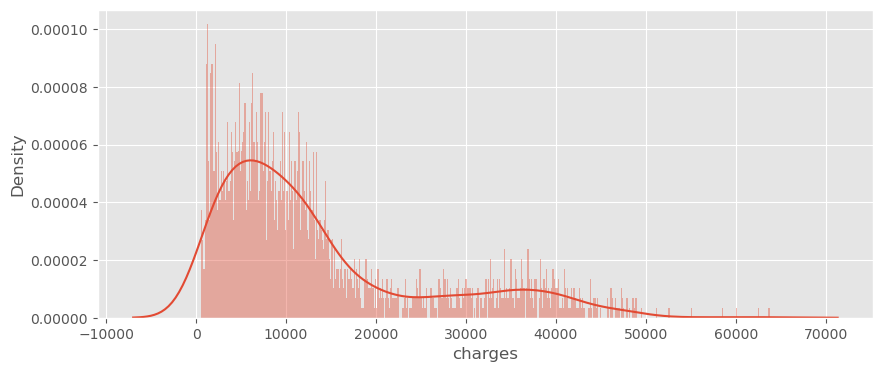

In [177]:
plt.figure(figsize=(10,4))
sns.distplot(df['charges'], hist=True, kde=True, bins=500)

<AxesSubplot:xlabel='charges', ylabel='BMI'>

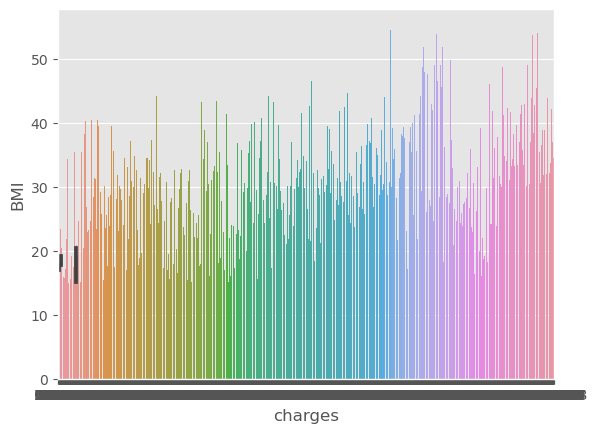

In [178]:
sns.barplot(data=df, x="charges", y="BMI")

<AxesSubplot:xlabel='charges', ylabel='HBA1C'>

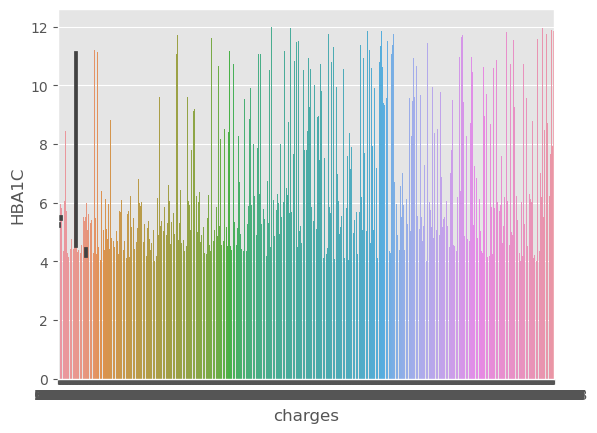

In [179]:
sns.barplot(data=df, x="charges", y="HBA1C")

<AxesSubplot:xlabel='City tier', ylabel='charges'>

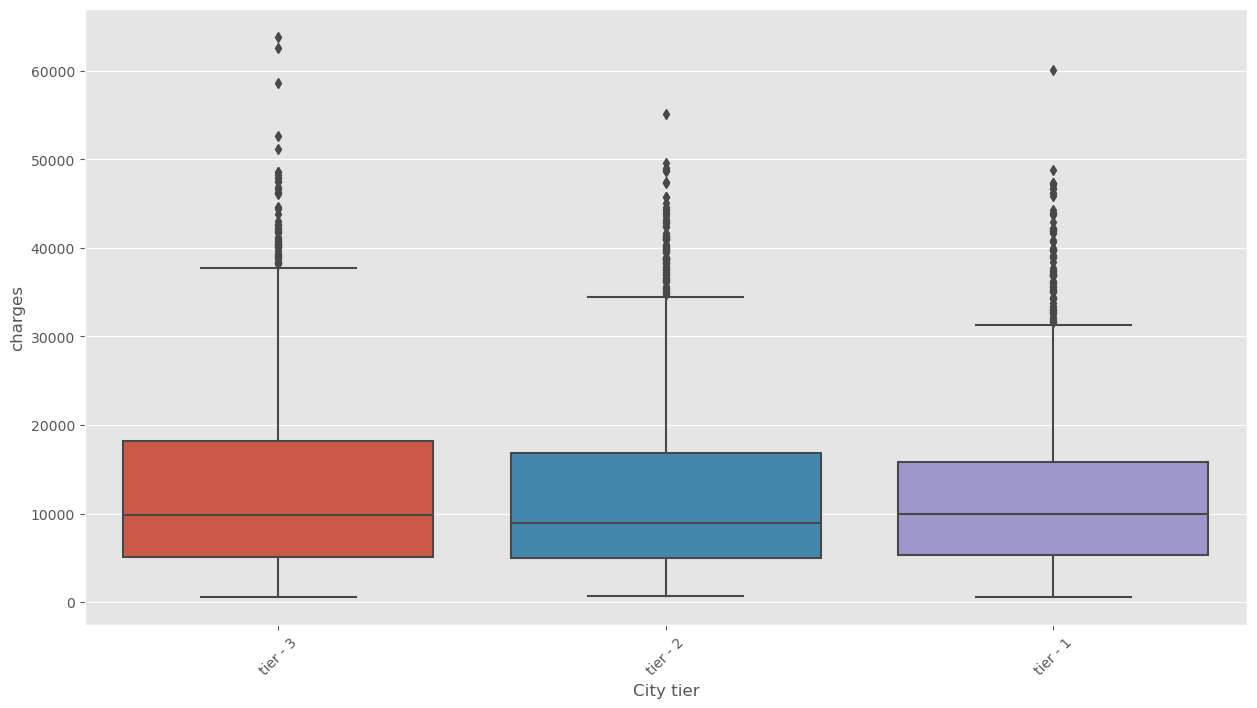

In [180]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('City tier', 'charges', data=df)

<AxesSubplot:xlabel='month', ylabel='charges'>

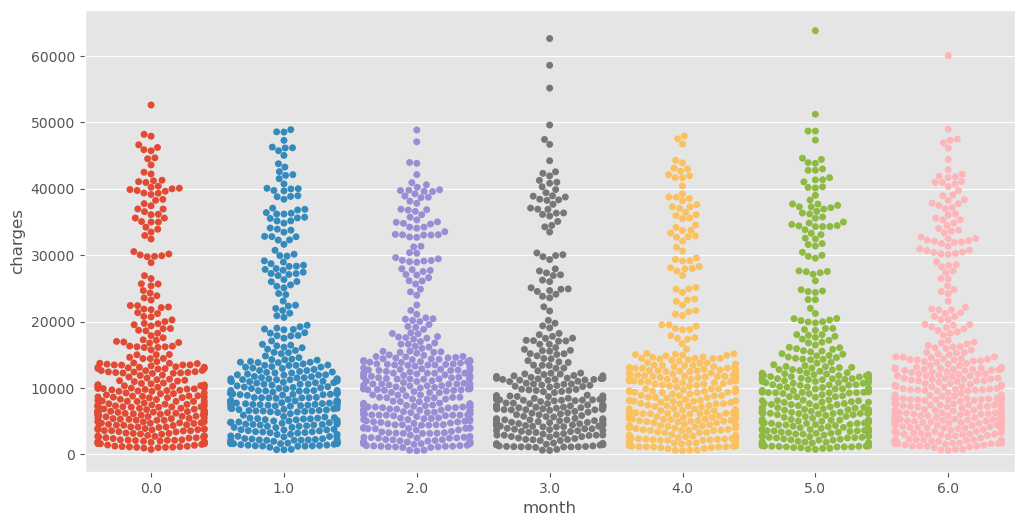

In [181]:
plt.figure(figsize=(12,6))
sns.swarmplot('month', 'charges', data=df)

## 10. State how the distribution is different across gender and tiers of hospitals.

In [182]:
sns.countplot('Hospital tier', data=df, hue='gender')

<AxesSubplot:xlabel='Hospital tier', ylabel='count'>

<Figure size 1000x400 with 0 Axes>

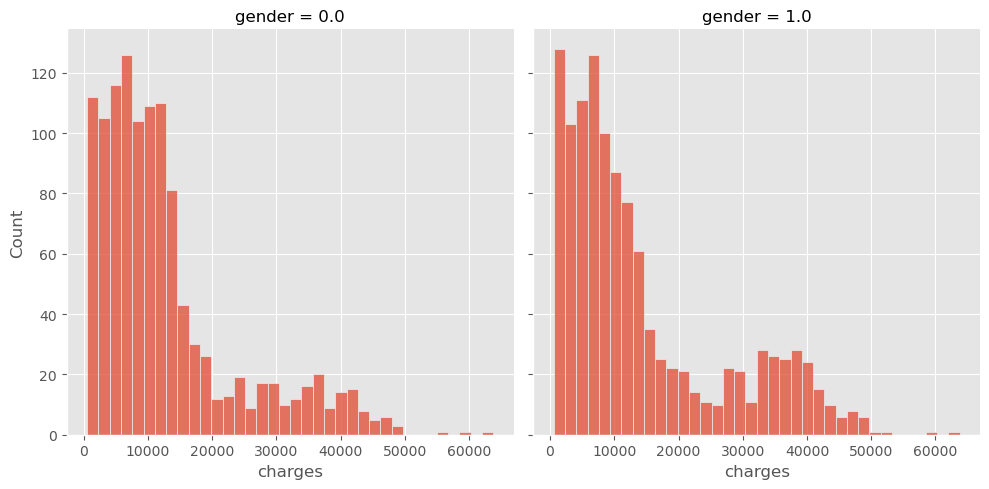

In [183]:
plt.figure(figsize=(10,4))
sns.displot(data= df, x= "charges", col= "gender")

<AxesSubplot:xlabel='smoker', ylabel='Count'>

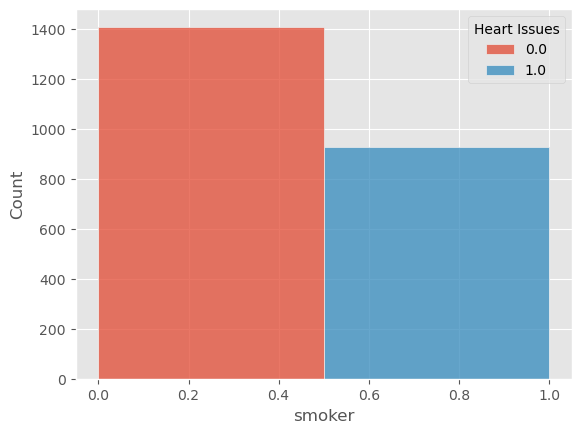

In [290]:
sns.histplot(binwidth=1,
            x="smoker",
            hue="Heart Issues",
            data=df,
            multiple="dodge")

In [293]:
gkk = df.groupby(['smoker', 'Heart Issues']).charges.mean()
gkk

smoker  Heart Issues
0.0     0.0              7802.864200
        1.0              9312.985565
1.0     0.0             32629.548316
        1.0             33400.803037
Name: charges, dtype: float64

<Figure size 1000x500 with 0 Axes>

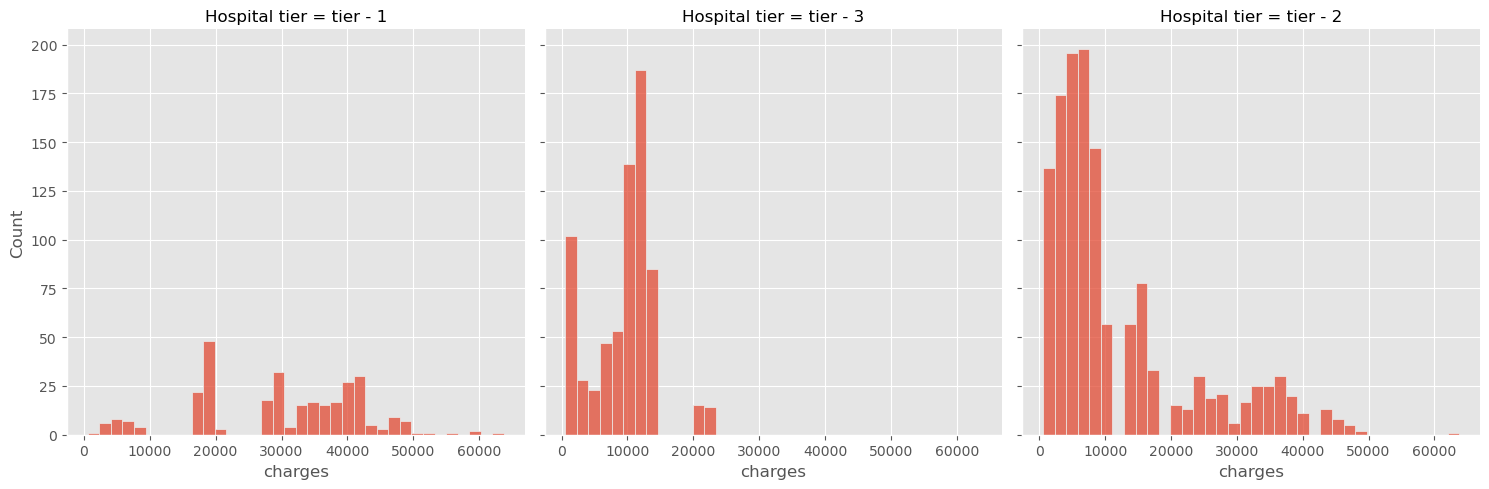

In [184]:
plt.figure(figsize=(10,5))
sns.displot(data= df, x= "charges", col= "Hospital tier")

<Figure size 1000x500 with 0 Axes>

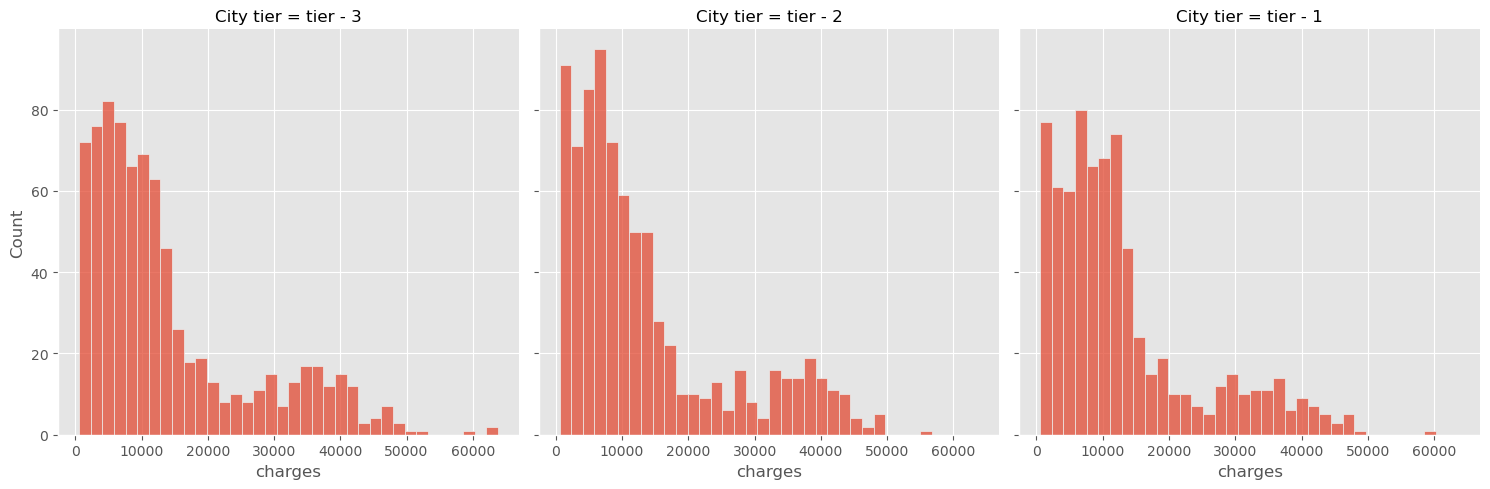

In [185]:
plt.figure(figsize=(10,5))
sns.displot(data= df, x= "charges", col= "City tier")

## 11. Create a radar chart to showcase the median hospitalization cost for each tier of hospitals

In [186]:
df[['charges']].groupby(df['Hospital tier']).median()

charges
Hospital tier           
tier - 1       32097.435
tier - 2        7188.605
tier - 3       10665.440

In [187]:
hospital_tier = ['tier_1','tier_2','tier_3']
charges = [32097.435,7188.605,10665.440]

In [188]:
angles=np.linspace(0,2*np.pi,len(hospital_tier), endpoint=False)
print(angles)

[0.        2.0943951 4.1887902]


In [189]:
angles=np.concatenate((angles,[angles[0]]))
print(angles)

[0.        2.0943951 4.1887902 0.       ]


In [190]:
hospital_tier.append(hospital_tier[0])
charges.append(charges[0])

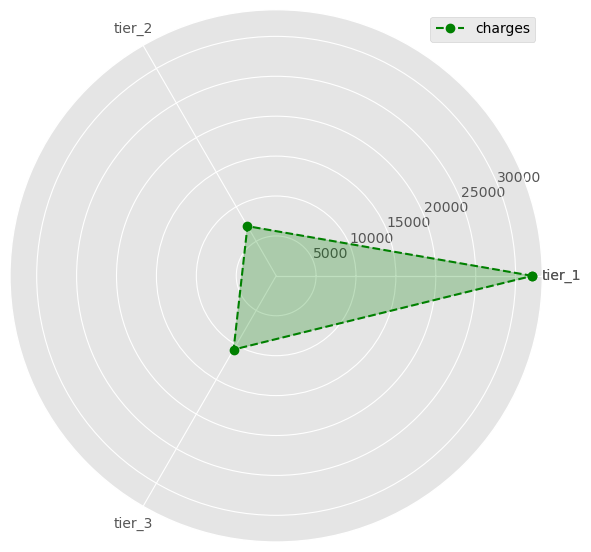

In [191]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)
#basic plot
ax.plot(angles,charges, 'o--', color='g', label='charges')
#fill plot
ax.fill(angles, charges, alpha=0.25, color='g')
#Add labels
ax.set_thetagrids(angles * 180/np.pi, hospital_tier)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

## 12. Create a frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities and hospitals.

In [192]:
freq_table = pd.crosstab(df['City tier'], df['Hospital tier'])

In [193]:
freq_table

Hospital tier  tier - 1  tier - 2  tier - 3
City tier                                  
tier - 1             86       404       242
tier - 2            107       479       223
tier - 3            111       455       228

In [194]:
df = df.dropna()
df.shape

(2335, 25)

In [195]:
freq_table2 = pd.crosstab(df['City tier'], df['gender'])
freq_table2

gender     0.0  1.0
City tier          
tier - 1   402  330
tier - 2   392  417
tier - 3   376  418

In [196]:
freq_table3 = pd.crosstab(df['Hospital tier'], df['gender'])
freq_table3

gender         0.0  1.0
Hospital tier          
tier - 1        93  211
tier - 2       781  557
tier - 3       296  397

<AxesSubplot:xlabel='City tier'>

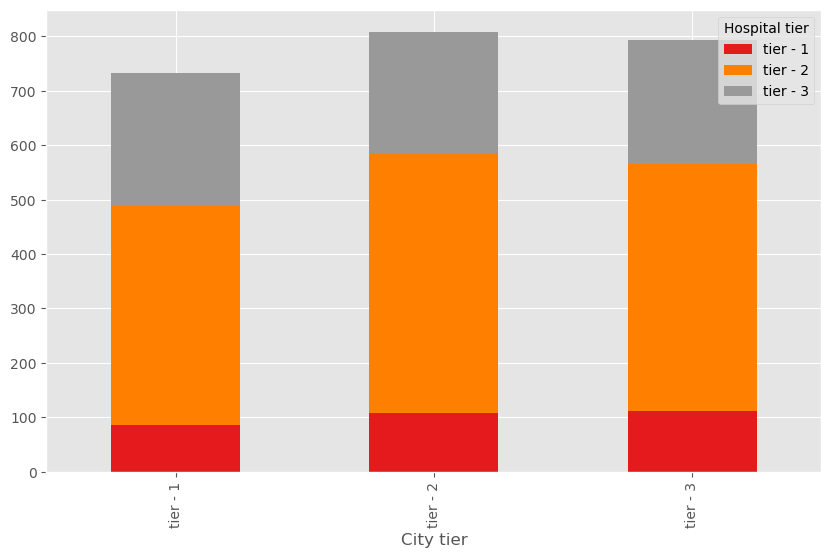

In [197]:
freq_table.plot(kind="bar", figsize=(10,6), stacked=True, colormap='Set1')

In [198]:
freq_table = pd.crosstab(df['Hospital tier'], df['City tier'])
freq_table

City tier      tier - 1  tier - 2  tier - 3
Hospital tier                              
tier - 1             86       107       111
tier - 2            404       479       455
tier - 3            242       223       228

<AxesSubplot:xlabel='Hospital tier'>

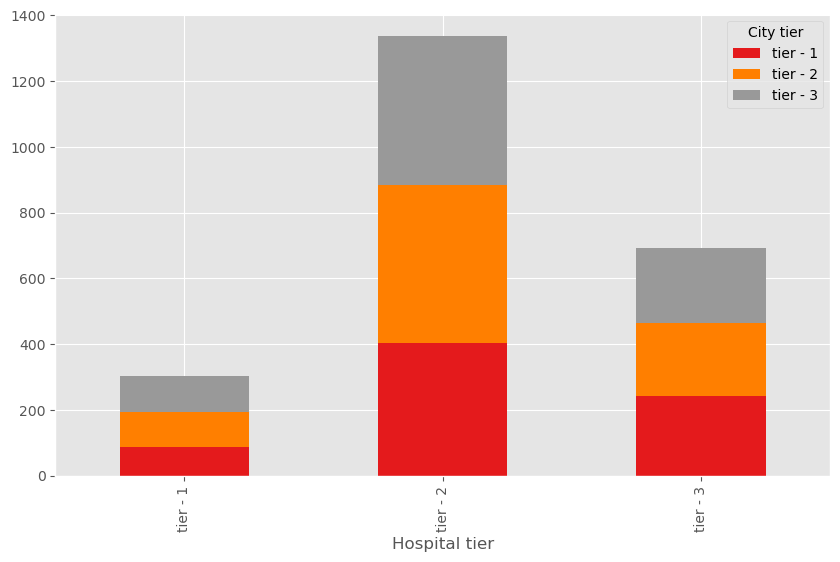

In [199]:
freq_table.plot(kind="bar", figsize=(10,6), stacked=True, colormap='Set1')

In [200]:
df.head()

Customer ID    year  month  date  children   charges Hospital tier  \
6           1.0  1968.0    5.0  12.0       0.0  63770.43      tier - 1   
7           2.0  1978.0    1.0  29.0       0.0  48885.14      tier - 1   
8           3.0  1977.0    3.0  27.0       2.0  40284.38      tier - 1   
9           4.0  1989.0    1.0  17.0       3.0  11250.43      tier - 3   
10          5.0  1969.0    1.0  30.0       2.0  11244.38      tier - 3   

   City tier    BMI  HBA1C  Heart Issues  Any Transplants  Cancer history  \
6   tier - 3  47.41   7.47           0.0              0.0             0.0   
7   tier - 2  38.06  10.79           0.0              0.0             0.0   
8   tier - 3  48.20   4.84           0.0              0.0             0.0   
9   tier - 2  39.17   4.15           0.0              0.0             0.0   
10  tier - 1  26.41   5.99           1.0              0.0             1.0   

    NumberOfMajorSurgeries  smoker   age  State_ID_R1011  State_ID_R1012  \
6                      0.0     1.0  55.0             0.0             0.0   
7                      0.0     1.0  45.0             0.0             0.0   
8                      0.0     1.0  46.0             0.0             1.0   
9                      0.0     0.0  34.0             0.0             0.0   
10                     1.0     0.0  54.0             0.0             0.0   

    State_ID_R1013  gender                    name  City_tier - 2  \
6              1.0     0.0             Kelly Hawks              0   
7              1.0     0.0        Brooke N. Benner              1   
8              0.0     1.0          Daniel Gollins              0   
9              0.0     0.0    Stephanie A Schaefer              1   
10             0.0     1.0    Patrick D'Alessandro              0   

    City_tier - 3  Hospital_tier - 2  Hospital_tier - 3  
6               1                  0                  0  
7               0                  0                  0  
8               1                  0                  0  
9               0                  0                  1  
10              0                  0                  1

In [201]:
df.columns

Index(['Customer ID', 'year', 'month', 'date', 'children', 'charges',
       'Hospital tier', 'City tier', 'BMI', 'HBA1C', 'Heart Issues',
       'Any Transplants', 'Cancer history', 'NumberOfMajorSurgeries', 'smoker',
       'age', 'State_ID_R1011', 'State_ID_R1012', 'State_ID_R1013', 'gender',
       'name', 'City_tier - 2', 'City_tier - 3', 'Hospital_tier - 2',
       'Hospital_tier - 3'],
      dtype='object')

## 13. Test the following null hypotheses:
* a.	The average hospitalization costs for the three types of hospitals are not significantly different
* b.	The average hospitalization costs for the three types of cities are not significantly different
* c.	The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers
* d.	Smoking and heart issues are independent

In [202]:
from scipy.stats import ttest_1samp,ttest_ind,mannwhitneyu,levene,shapiro
from statsmodels.stats.power import ttest_power

### 13.(a) The average hospitalization costs for the three types of hospitals are not significantly different 

In [203]:
Ho = "The average hospitalization costs for the three types of hospitals are not significantly different"
Ha = "The average hospitalization costs for the three types of hospitals are different"

In [204]:
x = np.array(df[df['Hospital_tier - 2']==1].charges)
x.shape

(1338,)

In [205]:
x

array([39983.43, 48824.45, 39963.12, ..., 13844.8 , 13844.51, 49577.66])

In [206]:
y=np.array(df[df['Hospital_tier - 2']==0].charges)
y

array([63770.43, 48885.14, 40284.38, 11250.43, 11244.38, 11217.35,
       11187.66, 11186.2 , 11165.42, 11163.57, 11150.78, 11103.33,
       11093.62, 40273.65, 11090.72, 11085.59, 11082.58, 11073.18,
       11070.54, 11068.77, 11068.7 , 11046.02, 11037.85, 11037.51,
       40208.56, 11033.66, 11028.56, 11018.05, 11015.17, 11013.71,
       10991.58, 10982.5 , 10977.21, 10976.25, 10965.45, 40204.83,
       10959.69, 10959.33, 10942.13, 10928.85, 10923.93, 10886.66,
       10848.13, 10825.25, 10807.49, 10806.84, 40182.25, 10797.34,
       10796.35, 10795.94, 10791.96, 10769.75, 10749.02, 10736.87,
       10719.57, 10713.64, 10704.47, 40103.89, 10702.64, 10698.38,
       10690.11, 10676.83, 10665.44, 10627.81, 10620.26, 10617.04,
       10608.67, 10602.39, 40069.44, 10601.63, 10601.41, 10600.55,
       10594.5 , 10594.23, 10579.71, 10577.09, 10564.88, 10560.49,
       10546.48, 40054.73, 10495.6 , 10493.95, 10486.55, 10464.83,
       10461.98, 10459.19, 10455.14, 10455.1 , 10450.55, 10436

In [207]:
len(y)

997

In [208]:
t,p_value = ttest_ind(x,y,axis=0)

In [209]:
p_value

3.2416490210413705e-15

In [210]:
if p_value<0.05:
    print(f'{Ha} as the p_value({p_value})<0.05')
else:
    print(f'{Ho} as the p_value({p_value})>0.05')

The average hospitalization costs for the three types of hospitals are different as the p_value(3.2416490210413705e-15)<0.05


### 13.(b) The average hospitalization costs for the three types of cities are not significantly different

In [211]:
Ho = "The average hospitalization costs for the three types of cities are not significantly different"
Ha = "The average hospitalization costs for the three types of cities different"

In [212]:
x = np.array(df[df['City_tier - 2']==1].charges)
x.shape

(809,)

In [213]:
x

array([48885.14, 11250.43, 11217.35, 11187.66, 11186.2 , 11163.57,
       11150.78, 11085.59, 11082.58, 11068.77, 11037.85, 40208.56,
       11018.05, 10976.25, 10965.45, 10807.49, 10806.84, 40182.25,
       10797.34, 10791.96, 10769.75, 10704.47, 40103.89, 10690.11,
       10665.44, 10601.63, 10601.41, 10560.49, 10455.14, 10419.65,
       10419.59, 10403.27, 10345.93, 10315.91, 39963.12, 10264.44,
       10259.13, 10214.64, 10191.82, 39871.7 , 10156.78, 10139.84,
       10096.97, 39865.7 , 10065.41, 10043.25,  9964.06,  9931.96,
        9907.83,  9872.7 ,  9870.59,  9861.03,  9819.25, 39727.61,
        9788.87,  9778.35,  9753.49,  9684.29,  9653.81,  9634.54,
        9630.91,  9630.4 ,  9630.3 ,  9628.79,  9582.54, 39721.93,
        9540.17,  9528.9 ,  9504.31,  9487.64,  9453.92,  9414.92,
        9386.16, 48675.52,  9380.75, 39597.41,  9282.48, 39556.49,
        9171.75,  9159.51,  9144.57, 39396.86,  9095.07,  9058.73,
        9048.03,  8978.19,  8968.33,  8964.06,  8944.12,  8930

In [214]:
y=np.array(df[df['City_tier - 2']==0].charges)
y

array([63770.43, 40284.38, 11244.38, ..., 11265.71, 11255.29, 11253.42])

In [215]:
len(y)

1526

In [216]:
t,p_value = ttest_ind(x,y,axis=0)

In [217]:
p_value

0.8030207913016422

In [218]:
if p_value<0.05:
    print(f'{Ha} as the p_value({p_value})<0.05')
else:
    print(f'{Ho} as the p_value({p_value})>0.05')

The average hospitalization costs for the three types of cities are not significantly different as the p_value(0.8030207913016422)>0.05


### 13.(c) The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers

In [219]:
Ho = "The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers"
Ha = "The average hospitalization cost for smokers is different from the average cost for nonsmokers"

In [220]:
x = np.array(df[df['smoker']==1].charges)
x.shape

(488,)

In [221]:
x

array([63770.43, 48885.14, 40284.38, 40273.65, 40208.56, 40204.83,
       40182.25, 40103.89, 40069.44, 40054.73, 40003.33, 39983.43,
       48824.45, 39963.12, 39871.7 , 39865.7 , 39836.52, 39774.28,
       39727.61, 39725.52, 39722.75, 39721.93, 39670.44, 48675.52,
       39611.76, 39597.41, 39556.49, 39396.86, 39352.6 , 39315.28,
       39241.44, 39221.12, 39125.33, 39047.29, 48673.56, 38998.55,
       38947.43, 38932.56, 38924.04, 38893.36, 38869.25, 38836.98,
       38792.69, 38746.36, 38740.12, 48549.18, 38711.  , 38709.18,
       38652.09, 38511.63, 38415.47, 38405.26, 38389.79, 38344.57,
       38313.13, 38282.75, 48517.56, 38245.59, 38241.74, 38237.34,
       38189.1 , 38126.25, 37829.72, 37800.98, 37742.58, 37735.2 ,
       37701.88, 48173.36, 37675.06, 37650.74, 37607.53, 37484.45,
       37465.34, 37425.94, 37277.27, 37272.34, 37270.15, 37251.22,
       47928.03, 37165.16, 37133.9 , 37079.37, 37076.37, 37040.88,
       36976.45, 36950.26, 36935.64, 36922.61, 36911.99, 47896

In [222]:
y=np.array(df[df['City_tier - 2']==0].charges)
y

array([63770.43, 40284.38, 11244.38, ..., 11265.71, 11255.29, 11253.42])

In [223]:
len(y)

1526

In [224]:
t,p_value = ttest_ind(x,y,axis=0)

In [225]:
p_value

1.0325163771704597e-192

In [226]:
if p_value<0.05:
    print(f'{Ha} as the p_value({p_value})<0.05')
else:
    print(f'{Ho} as the p_value({p_value})>0.05')

The average hospitalization cost for smokers is different from the average cost for nonsmokers as the p_value(1.0325163771704597e-192)<0.05


### 13.(d) Smoking and heart issues are independent

In [227]:
Ho = "Smoking and heart issues are independent"
Ha = "Smoking and heart issues are dependent"

In [228]:
x = np.array(df[df['Heart Issues']==1].smoker)
x.shape

(926,)

In [229]:
x

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [230]:
y=np.array(df[df['Heart Issues']==0].smoker)
y

array([1., 1., 1., ..., 0., 0., 0.])

In [231]:
len(y)

1409

In [232]:
t,p_value = ttest_ind(x,y,axis=0)

In [233]:
p_value

0.7926314371143053

In [234]:
if p_value<0.05:
    print(f'{Ha} as the p_value({p_value})<0.05')
else:
    print(f'{Ho} as the p_value({p_value})>0.05')

Smoking and heart issues are independent as the p_value(0.7926314371143053)>0.05


# Week 2 - Machine Learning

## 1. Examine the correlation between predictors to identify highly correlated predictors. Use a heatmap to visualize this.

In [235]:
df.head()

Customer ID    year  month  date  children   charges Hospital tier  \
6           1.0  1968.0    5.0  12.0       0.0  63770.43      tier - 1   
7           2.0  1978.0    1.0  29.0       0.0  48885.14      tier - 1   
8           3.0  1977.0    3.0  27.0       2.0  40284.38      tier - 1   
9           4.0  1989.0    1.0  17.0       3.0  11250.43      tier - 3   
10          5.0  1969.0    1.0  30.0       2.0  11244.38      tier - 3   

   City tier    BMI  HBA1C  Heart Issues  Any Transplants  Cancer history  \
6   tier - 3  47.41   7.47           0.0              0.0             0.0   
7   tier - 2  38.06  10.79           0.0              0.0             0.0   
8   tier - 3  48.20   4.84           0.0              0.0             0.0   
9   tier - 2  39.17   4.15           0.0              0.0             0.0   
10  tier - 1  26.41   5.99           1.0              0.0             1.0   

    NumberOfMajorSurgeries  smoker   age  State_ID_R1011  State_ID_R1012  \
6                      0.0     1.0  55.0             0.0             0.0   
7                      0.0     1.0  45.0             0.0             0.0   
8                      0.0     1.0  46.0             0.0             1.0   
9                      0.0     0.0  34.0             0.0             0.0   
10                     1.0     0.0  54.0             0.0             0.0   

    State_ID_R1013  gender                    name  City_tier - 2  \
6              1.0     0.0             Kelly Hawks              0   
7              1.0     0.0        Brooke N. Benner              1   
8              0.0     1.0          Daniel Gollins              0   
9              0.0     0.0    Stephanie A Schaefer              1   
10             0.0     1.0    Patrick D'Alessandro              0   

    City_tier - 3  Hospital_tier - 2  Hospital_tier - 3  
6               1                  0                  0  
7               0                  0                  0  
8               1                  0                  0  
9               0                  0                  1  
10              0                  0                  1

In [236]:
df.isna().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
age                       0
State_ID_R1011            0
State_ID_R1012            0
State_ID_R1013            0
gender                    0
name                      0
City_tier - 2             0
City_tier - 3             0
Hospital_tier - 2         0
Hospital_tier - 3         0
dtype: int64

In [237]:
corr_df = df.drop(['City_tier - 2','City_tier - 3','Hospital_tier - 2','Hospital_tier - 3','name'],axis=1)

In [238]:
corr = corr_df.corr()
corr

Customer ID      year     month      date  children  \
Customer ID                1.000000 -0.074826  0.021813 -0.021438 -0.082788   
year                      -0.074826  1.000000  0.005629 -0.031502  0.004100   
month                      0.021813  0.005629  1.000000 -0.004602  0.004214   
date                      -0.021438 -0.031502 -0.004602  1.000000  0.024836   
children                  -0.082788  0.004100  0.004214  0.024836  1.000000   
charges                    0.243756 -0.304353 -0.015519 -0.007394  0.059122   
BMI                        0.135476 -0.051871 -0.024099  0.042479 -0.004793   
HBA1C                      0.029652 -0.460332 -0.024752  0.060544 -0.100593   
Heart Issues               0.042716 -0.191892 -0.042526  0.003325  0.024967   
Any Transplants            0.044431  0.381959  0.015032 -0.035154 -0.142340   
Cancer history             0.054392  0.099374  0.005957 -0.018072 -0.027918   
NumberOfMajorSurgeries     0.082321 -0.151774  0.039609 -0.024065 -0.111019   
smoker                     0.198970 -0.013153  0.004530 -0.018730  0.019164   
age                        0.074826 -1.000000 -0.005629  0.031502 -0.004100   
State_ID_R1011             0.035436 -0.009797  0.030696 -0.008500  0.011482   
State_ID_R1012             0.005209  0.004869 -0.003804  0.005807  0.005012   
State_ID_R1013            -0.088415  0.014137  0.010658 -0.012391 -0.011645   
gender                    -0.022301  0.020113  0.003367  0.022046  0.017390   

                         charges       BMI     HBA1C  Heart Issues  \
Customer ID             0.243756  0.135476  0.029652      0.042716   
year                   -0.304353 -0.051871 -0.460332     -0.191892   
month                  -0.015519 -0.024099 -0.024752     -0.042526   
date                   -0.007394  0.042479  0.060544      0.003325   
children                0.059122 -0.004793 -0.100593      0.024967   
charges                 1.000000  0.347695  0.142246      0.051213   
BMI                     0.347695  1.000000 -0.006111      0.016937   
HBA1C                   0.142246 -0.006111  1.000000      0.010254   
Heart Issues            0.051213  0.016937  0.010254      1.000000   
Any Transplants        -0.121881  0.016597 -0.160079     -0.138683   
Cancer history         -0.022709 -0.019010 -0.170799      0.110060   
NumberOfMajorSurgeries  0.058482  0.020850 -0.088516      0.208136   
smoker                  0.838314  0.109280  0.009076     -0.005443   
age                     0.304353  0.051871  0.460332      0.191892   
State_ID_R1011          0.284898  0.116880  0.014884      0.004812   
State_ID_R1012         -0.072718  0.017284 -0.017467      0.022292   
State_ID_R1013         -0.149667 -0.208631  0.031012     -0.026839   
gender                  0.063895  0.016351 -0.024760     -0.001766   

                        Any Transplants  Cancer history  \
Customer ID                    0.044431        0.054392   
year                           0.381959        0.099374   
month                          0.015032        0.005957   
date                          -0.035154       -0.018072   
children                      -0.142340       -0.027918   
charges                       -0.121881       -0.022709   
BMI                            0.016597       -0.019010   
HBA1C                         -0.160079       -0.170799   
Heart Issues                  -0.138683        0.110060   
Any Transplants                1.000000       -0.114974   
Cancer history                -0.114974        1.000000   
NumberOfMajorSurgeries         0.161075        0.203292   
smoker                        -0.022310        0.006442   
age                           -0.381959       -0.099374   
State_ID_R1011                -0.059535        0.013007   
State_ID_R1012                -0.068020        0.057813   
State_ID_R1013                 0.065248       -0.067260   
gender                         0.007670       -0.013951   

                        NumberOfMajorSurgeries    smoker       age  \

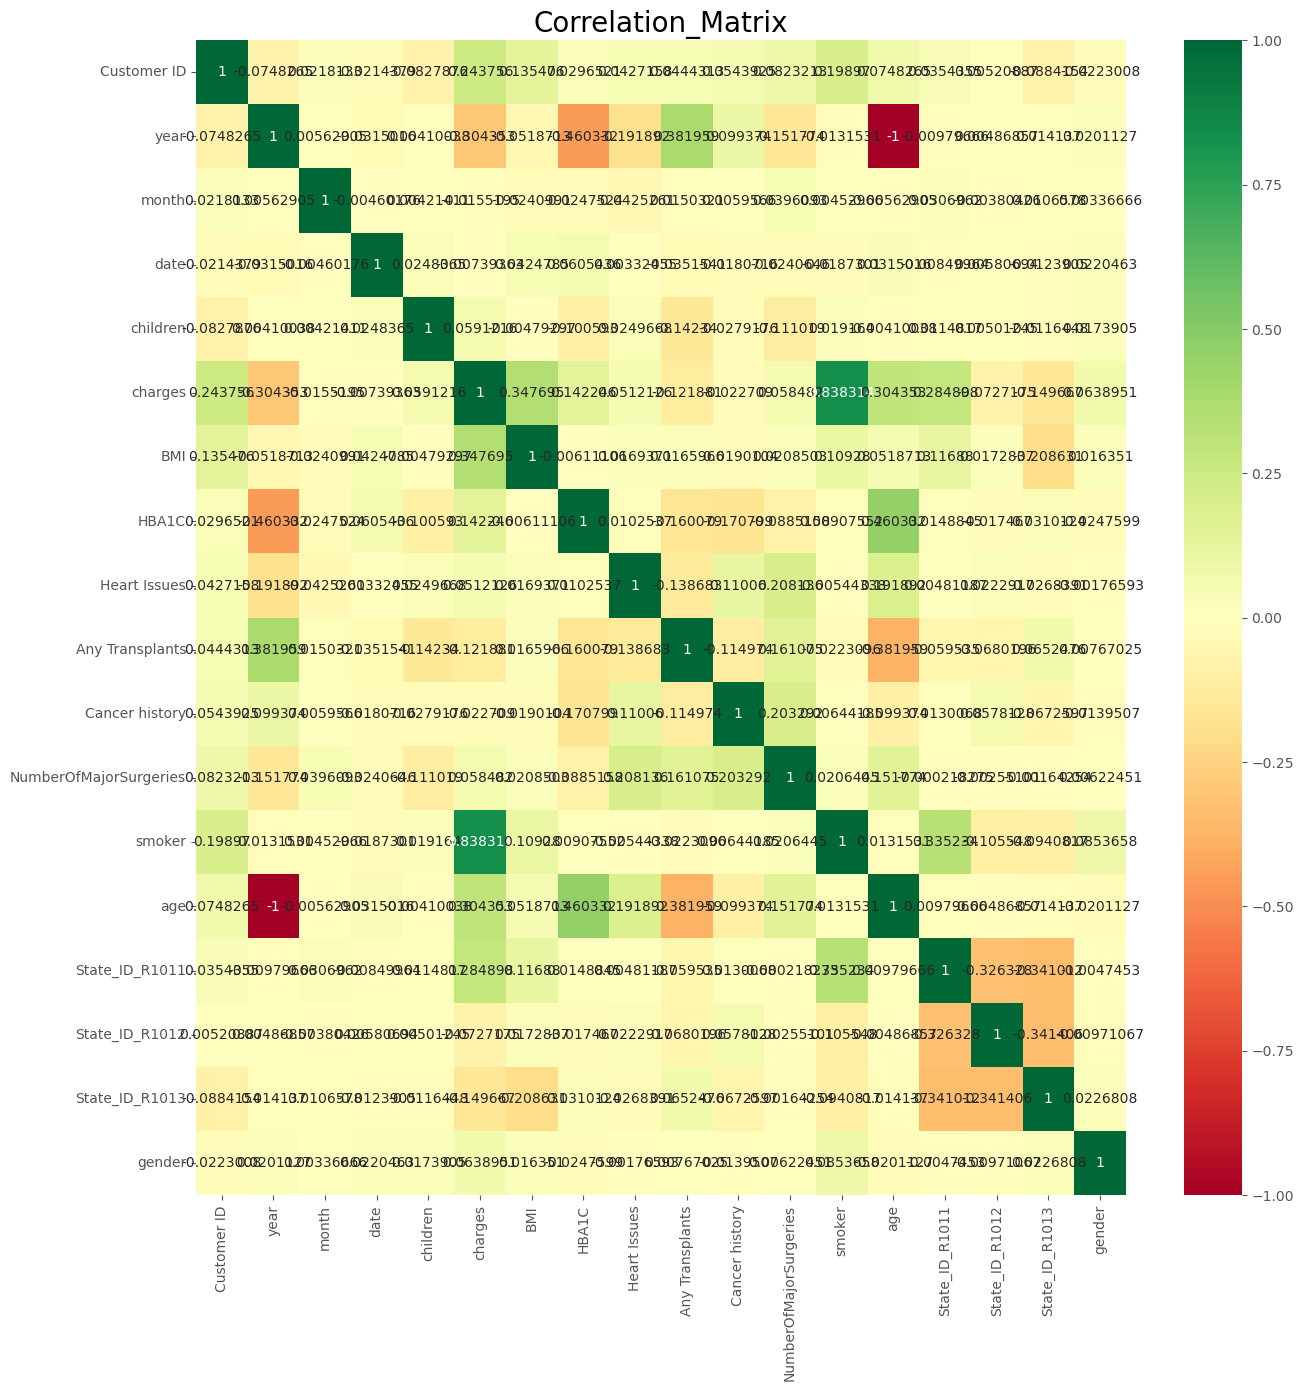

In [239]:
plt.figure(figsize=(15,15))
plt.title('Correlation_Matrix',fontsize=20)
sns.heatmap(corr,cmap='RdYlGn',fmt='g',annot=True,vmax=1.0,vmin=-1.0)
plt.show()

In [240]:
plt.figure(figsize=(15,7))
plt.title('Correlation Matrix',fontsize=20)
sns.heatmap(corr[['charges']],cmap='RdYlGn',vmax=1.0,vmin=-1.0,fmt='g',annot=True)
plt.show()

## 2. Develop and evaluate the final model using regression with a stochastic gradient descent optimizer. Also, ensure that you apply all the following suggestions: 
* Note: 
* Perform the stratified 5-fold cross-validation technique for model building and validation 
* Use standardization and hyperparameter tuning effectively 
* Use sklearn-pipelines 
* Use appropriate regularization techniques to address the bias-variance trade-off
* (a) Create five folds in the data, and introduce a variable to identify the folds
* (b) For each fold, run a for loop and ensure that 80 percent of the data is used to train the model and the remaining 20            percent is used to validate it in each iteration
* (c) Develop five distinct models and five distinct validation scores (root mean squared error values)
* (d) Determine the variable importance scores, and identify the redundant variables

In [241]:
df.head()

Customer ID    year  month  date  children   charges Hospital tier  \
6           1.0  1968.0    5.0  12.0       0.0  63770.43      tier - 1   
7           2.0  1978.0    1.0  29.0       0.0  48885.14      tier - 1   
8           3.0  1977.0    3.0  27.0       2.0  40284.38      tier - 1   
9           4.0  1989.0    1.0  17.0       3.0  11250.43      tier - 3   
10          5.0  1969.0    1.0  30.0       2.0  11244.38      tier - 3   

   City tier    BMI  HBA1C  Heart Issues  Any Transplants  Cancer history  \
6   tier - 3  47.41   7.47           0.0              0.0             0.0   
7   tier - 2  38.06  10.79           0.0              0.0             0.0   
8   tier - 3  48.20   4.84           0.0              0.0             0.0   
9   tier - 2  39.17   4.15           0.0              0.0             0.0   
10  tier - 1  26.41   5.99           1.0              0.0             1.0   

    NumberOfMajorSurgeries  smoker   age  State_ID_R1011  State_ID_R1012  \
6                      0.0     1.0  55.0             0.0             0.0   
7                      0.0     1.0  45.0             0.0             0.0   
8                      0.0     1.0  46.0             0.0             1.0   
9                      0.0     0.0  34.0             0.0             0.0   
10                     1.0     0.0  54.0             0.0             0.0   

    State_ID_R1013  gender                    name  City_tier - 2  \
6              1.0     0.0             Kelly Hawks              0   
7              1.0     0.0        Brooke N. Benner              1   
8              0.0     1.0          Daniel Gollins              0   
9              0.0     0.0    Stephanie A Schaefer              1   
10             0.0     1.0    Patrick D'Alessandro              0   

    City_tier - 3  Hospital_tier - 2  Hospital_tier - 3  
6               1                  0                  0  
7               0                  0                  0  
8               1                  0                  0  
9               0                  0                  1  
10              0                  0                  1

In [242]:
df.tail()

Customer ID    year  month  date  children   charges Hospital tier  \
2336       2333.0  2004.0    5.0   4.0       1.0  11272.33      tier - 3   
2337       2334.0  1971.0    1.0  26.0       0.0  11265.71      tier - 3   
2338       2335.0  1969.0    5.0  11.0       3.0  11264.54      tier - 3   
2339       2336.0  1981.0    5.0   2.0       1.0  11255.29      tier - 3   
2340       2337.0  1969.0    0.0  20.0       3.0  11253.42      tier - 3   

     City tier    BMI  HBA1C  Heart Issues  Any Transplants  Cancer history  \
2336  tier - 2  28.31   4.55           0.0              1.0             0.0   
2337  tier - 1  29.79   9.03           0.0              0.0             0.0   
2338  tier - 2  36.60   5.20           1.0              0.0             1.0   
2339  tier - 1  35.93   8.30           1.0              0.0             0.0   
2340  tier - 1  28.60   5.56           1.0              0.0             1.0   

      NumberOfMajorSurgeries  smoker   age  State_ID_R1011  State_ID_R1012  \
2336                     1.0     0.0  19.0             0.0             0.0   
2337                     0.0     0.0  52.0             0.0             0.0   
2338                     1.0     0.0  54.0             1.0             0.0   
2339                     0.0     0.0  42.0             0.0             0.0   
2340                     1.0     0.0  54.0             1.0             0.0   

      State_ID_R1013  gender                    name  City_tier - 2  \
2336             0.0     1.0         Daniel J Peters              1   
2337             0.0     0.0     Courtney M. Susedik              0   
2338             0.0     1.0          Jose A. Garcia              1   
2339             0.0     0.0            Lauren Deady              0   
2340             0.0     1.0    Jonathon M. Campbell              0   

      City_tier - 3  Hospital_tier - 2  Hospital_tier - 3  
2336              0                  0                  1  
2337              0                  0                  1  
2338              0                  0                  1  
2339              0                  0                  1  
2340              0                  0                  1

In [243]:
final.head()

Customer ID    year  month  date  children   charges    BMI  HBA1C  \
6           1.0  1968.0    5.0  12.0       0.0  63770.43  47.41   7.47   
7           2.0  1978.0    1.0  29.0       0.0  48885.14  38.06  10.79   
8           3.0  1977.0    3.0  27.0       2.0  40284.38  48.20   4.84   
9           4.0  1989.0    1.0  17.0       3.0  11250.43  39.17   4.15   
10          5.0  1969.0    1.0  30.0       2.0  11244.38  26.41   5.99   

    Heart Issues  Any Transplants  Cancer history  NumberOfMajorSurgeries  \
6            0.0              0.0             0.0                     0.0   
7            0.0              0.0             0.0                     0.0   
8            0.0              0.0             0.0                     0.0   
9            0.0              0.0             0.0                     0.0   
10           1.0              0.0             1.0                     1.0   

    smoker   age  State_ID_R1011  State_ID_R1012  State_ID_R1013  gender  \
6      1.0  55.0             0.0             0.0             1.0     0.0   
7      1.0  45.0             0.0             0.0             1.0     0.0   
8      1.0  46.0             0.0             1.0             0.0     1.0   
9      0.0  34.0             0.0             0.0             0.0     0.0   
10     0.0  54.0             0.0             0.0             0.0     1.0   

    City_tier - 2  City_tier - 3  Hospital_tier - 2  Hospital_tier - 3  
6               0              1                  0                  0  
7               1              0                  0                  0  
8               0              1                  0                  0  
9               1              0                  0                  1  
10              0              0                  0                  1

In [244]:
final.shape

(2343, 22)

In [245]:
final = final.drop('Customer ID',axis=1)
final.head()

year  month  date  children   charges    BMI  HBA1C  Heart Issues  \
6   1968.0    5.0  12.0       0.0  63770.43  47.41   7.47           0.0   
7   1978.0    1.0  29.0       0.0  48885.14  38.06  10.79           0.0   
8   1977.0    3.0  27.0       2.0  40284.38  48.20   4.84           0.0   
9   1989.0    1.0  17.0       3.0  11250.43  39.17   4.15           0.0   
10  1969.0    1.0  30.0       2.0  11244.38  26.41   5.99           1.0   

    Any Transplants  Cancer history  NumberOfMajorSurgeries  smoker   age  \
6               0.0             0.0                     0.0     1.0  55.0   
7               0.0             0.0                     0.0     1.0  45.0   
8               0.0             0.0                     0.0     1.0  46.0   
9               0.0             0.0                     0.0     0.0  34.0   
10              0.0             1.0                     1.0     0.0  54.0   

    State_ID_R1011  State_ID_R1012  State_ID_R1013  gender  City_tier - 2  \
6              0.0             0.0             1.0     0.0              0   
7              0.0             0.0             1.0     0.0              1   
8              0.0             1.0             0.0     1.0              0   
9              0.0             0.0             0.0     0.0              1   
10             0.0             0.0             0.0     1.0              0   

    City_tier - 3  Hospital_tier - 2  Hospital_tier - 3  
6               1                  0                  0  
7               0                  0                  0  
8               1                  0                  0  
9               0                  0                  1  
10              0                  0                  1

In [246]:
from sklearn.preprocessing import MinMaxScaler

In [247]:
minmax = MinMaxScaler()

In [248]:
final_scaled = minmax.fit_transform(final)
final_scaled = pd.DataFrame(final_scaled,columns=final.columns)
final_scaled

year     month      date  children   charges       BMI    HBA1C  \
0     0.217391  0.833333  0.379310       0.0  1.000000  0.809191  0.43375   
1     0.434783  0.166667  0.965517       0.0  0.764498  0.575674  0.84875   
2     0.413043  0.500000  0.896552       0.4  0.628424  0.828921  0.10500   
3     0.673913  0.166667  0.551724       0.6  0.169074  0.603397  0.01875   
4     0.239130  0.166667  1.000000       0.4  0.168978  0.284715  0.24875   
5     0.391304  0.500000  0.931034       0.4  0.168551  0.390110  0.22500   
6     0.260870  0.500000  0.448276       0.4  0.168081  0.417582  0.41500   
7     0.304348  1.000000  0.068966       0.0  0.168058  0.391858  0.14500   
8     0.173913  0.000000  0.172414       0.0  0.167729  0.272852  0.24500   
9     0.239130  0.500000  0.827586       0.4  0.167700  0.521728  0.10625   
10    0.239130  0.666667  1.000000       0.4  0.167497  0.291958  0.13625   
11    0.478261  0.000000  0.655172       0.4  0.166747  0.467033  0.11750   
12    0.173913  0.333333  0.137931       0.0  0.166593  0.671828  0.11500   
13    0.500000  0.833333  0.103448       0.2  0.628254  0.517982  0.50000   
14    0.173913  1.000000  0.275862       0.0  0.166547  0.619630  0.25625   
15    0.304348  0.833333  0.206897       0.6  0.166466  0.327423  0.08375   
16    0.195652  1.000000  0.103448       0.0  0.166418  0.298951  0.72625   
17    0.173913  0.666667  0.655172       0.0  0.166270  0.304446  0.25750   
18    0.173913  0.666667  0.206897       0.0  0.166228  0.256993  0.14875   
19    0.282609  0.666667  0.275862       0.0  0.166200  0.380619  0.77000   
20    0.913043  1.000000  0.586207       0.0  0.166199  0.973776  0.08500   
21    0.934783  0.166667  0.551724       0.0  0.165840  0.920330  0.16500   
22    0.347826  0.000000  1.000000       0.0  0.165711  0.409091  0.37375   
23    0.673913  0.833333  0.827586       0.6  0.165705  0.623377  0.19375   
24    0.500000  0.333333  0.931034       0.2  0.627224  0.969031  0.59625   
25    0.347826  0.166667  0.310345       0.8  0.165644  0.654845  0.36750   
26    0.826087  0.333333  0.689655       0.0  0.165564  0.860140  0.02500   
27    0.717391  0.500000  0.862069       0.6  0.165397  0.650100  0.19875   
28    0.347826  0.166667  0.482759       0.8  0.165352  0.322677  0.74500   
29    0.217391  0.833333  0.793103       0.4  0.165329  0.149850  0.42125   
30    0.913043  1.000000  0.551724       0.0  0.164979  0.933067  0.13250   
31    0.152174  0.166667  0.586207       0.0  0.164835  0.633367  0.52625   
32    0.326087  0.833333  0.689655       0.8  0.164751  0.660839  0.79250   
33    0.173913  0.333333  0.275862       0.0  0.164736  0.467408  0.18875   
34    0.152174  0.500000  0.620690       0.0  0.164565  0.326923  0.90000   
35    0.456522  0.000000  0.586207       0.4  0.627165  0.860889  0.12000   
36    0.239130  0.000000  0.448276       0.2  0.164474  0.559940  0.04375   
37    0.152174  0.166667  0.103448       0.0  0.164468  0.217033  0.80625   
38    0.239130  0.666667  0.310345       0.2  0.164196  0.244381  0.00875   
39    0.217391  0.666667  0.379310       0.2  0.163986  0.421828  0.54250   
40    0.217391  0.666667  0.413793       0.0  0.163908  0.441309  0.42625   
41    0.782609  1.000000  0.172414       0.0  0.163319  0.802198  0.03875   
42    0.282609  0.166667  0.655172       0.4  0.162709  0.540959  0.85375   
43    0.217391  0.333333  0.931034       0.2  0.162347  0.465035  0.91375   
44    0.195652  0.833333  0.034483       0.2  0.162066  0.441059  0.97625   
45    0.260870  0.166667  0.586207       0.4  0.162056  0.456793  0.53250   
46    0.586957  0.833333  0.689655       0.8  0.626808  0.476773  0.05375   
47    0.260870  0.833333  0.931034       0.2  0.161906  0.393856  0.84250   
48    0.195652  0.833333  0.758621       0.0  0.161890  0.348776  0.46125   
49    0.891304  0.166667  0.793103       0.0  0.161883  0.459291  0.10500   
50    0.195652  0.666667  0.344828       0.2  0.161820  0.162088  0.72125   
51    

In [249]:
variance = final_scaled.var()
columns = final_scaled.columns

In [250]:
variable = [ ]

for i in range(0,len(variance)):
    if variance[i]>=0.006: #setting the threshold as 1%
        variable.append(columns[i])
variable

['year',
 'month',
 'date',
 'children',
 'charges',
 'BMI',
 'HBA1C',
 'Heart Issues',
 'Any Transplants',
 'Cancer history',
 'NumberOfMajorSurgeries',
 'smoker',
 'age',
 'State_ID_R1011',
 'State_ID_R1012',
 'State_ID_R1013',
 'gender',
 'City_tier - 2',
 'City_tier - 3',
 'Hospital_tier - 2',
 'Hospital_tier - 3']

In [251]:
len(variable)

21

In [252]:
final.head()

year  month  date  children   charges    BMI  HBA1C  Heart Issues  \
6   1968.0    5.0  12.0       0.0  63770.43  47.41   7.47           0.0   
7   1978.0    1.0  29.0       0.0  48885.14  38.06  10.79           0.0   
8   1977.0    3.0  27.0       2.0  40284.38  48.20   4.84           0.0   
9   1989.0    1.0  17.0       3.0  11250.43  39.17   4.15           0.0   
10  1969.0    1.0  30.0       2.0  11244.38  26.41   5.99           1.0   

    Any Transplants  Cancer history  NumberOfMajorSurgeries  smoker   age  \
6               0.0             0.0                     0.0     1.0  55.0   
7               0.0             0.0                     0.0     1.0  45.0   
8               0.0             0.0                     0.0     1.0  46.0   
9               0.0             0.0                     0.0     0.0  34.0   
10              0.0             1.0                     1.0     0.0  54.0   

    State_ID_R1011  State_ID_R1012  State_ID_R1013  gender  City_tier - 2  \
6              0.0             0.0             1.0     0.0              0   
7              0.0             0.0             1.0     0.0              1   
8              0.0             1.0             0.0     1.0              0   
9              0.0             0.0             0.0     0.0              1   
10             0.0             0.0             0.0     1.0              0   

    City_tier - 3  Hospital_tier - 2  Hospital_tier - 3  
6               1                  0                  0  
7               0                  0                  0  
8               1                  0                  0  
9               0                  0                  1  
10              0                  0                  1

In [253]:
final = final.dropna()
final.isna().sum()

year                      0
month                     0
date                      0
children                  0
charges                   0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
age                       0
State_ID_R1011            0
State_ID_R1012            0
State_ID_R1013            0
gender                    0
City_tier - 2             0
City_tier - 3             0
Hospital_tier - 2         0
Hospital_tier - 3         0
dtype: int64

In [254]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [255]:
X = final.drop('charges',axis=1)
y = final['charges']

In [256]:
X

year  month  date  children     BMI  HBA1C  Heart Issues  \
6     1968.0    5.0  12.0       0.0  47.410   7.47           0.0   
7     1978.0    1.0  29.0       0.0  38.060  10.79           0.0   
8     1977.0    3.0  27.0       2.0  48.200   4.84           0.0   
9     1989.0    1.0  17.0       3.0  39.170   4.15           0.0   
10    1969.0    1.0  30.0       2.0  26.410   5.99           1.0   
11    1976.0    3.0  28.0       2.0  30.630   5.80           1.0   
12    1970.0    3.0  14.0       2.0  31.730   7.32           1.0   
13    1972.0    6.0   3.0       0.0  30.700   5.16           0.0   
14    1966.0    0.0   6.0       0.0  25.935   5.96           1.0   
15    1969.0    3.0  25.0       2.0  35.900   4.85           1.0   
16    1969.0    4.0  30.0       2.0  26.700   5.09           1.0   
17    1980.0    0.0  20.0       2.0  33.710   4.94           0.0   
18    1966.0    2.0   5.0       0.0  41.910   4.92           1.0   
19    1981.0    5.0   4.0       1.0  35.750   8.00           1.0   
20    1966.0    6.0   9.0       0.0  39.820   6.05           1.0   
21    1972.0    5.0   7.0       3.0  28.120   4.67           0.0   
22    1967.0    6.0   4.0       0.0  26.980   9.81           1.0   
23    1966.0    4.0  20.0       0.0  27.200   6.06           1.0   
24    1966.0    4.0   7.0       0.0  25.300   5.19           1.0   
25    1971.0    4.0   9.0       0.0  30.250  10.16           0.0   
26    2000.0    6.0  18.0       0.0  54.000   4.68           1.0   
27    2001.0    1.0  17.0       0.0  51.860   5.32           1.0   
28    1974.0    0.0  30.0       0.0  31.390   6.99           0.0   
29    1989.0    5.0  25.0       3.0  39.970   5.55           0.0   
30    1981.0    2.0  28.0       1.0  53.810   8.77           1.0   
31    1974.0    1.0  10.0       4.0  41.230   6.94           0.0   
32    1996.0    2.0  21.0       0.0  49.450   4.20           1.0   
33    1991.0    3.0  26.0       3.0  41.040   5.59           0.0   
34    1974.0    1.0  15.0       4.0  27.930   9.96           0.0   
35    1968.0    5.0  24.0       2.0  21.010   7.37           0.0   
36    2000.0    6.0  17.0       0.0  52.370   5.06           1.0   
37    1965.0    1.0  18.0       0.0  40.370   8.21           0.0   
38    1973.0    5.0  21.0       4.0  41.470  10.34           0.0   
39    1966.0    2.0   9.0       0.0  33.725   5.51           1.0   
40    1965.0    3.0  19.0       0.0  28.100  11.20           0.0   
41    1979.0    0.0  18.0       2.0  49.480   4.96           0.0   
42    1969.0    0.0  14.0       1.0  37.430   4.35           1.0   
43    1965.0    1.0   4.0       0.0  23.700  10.45           0.0   
44    1969.0    4.0  10.0       1.0  24.795   4.07           1.0   
45    1968.0    4.0  12.0       1.0  31.900   8.34           0.0   
46    1968.0    4.0  13.0       0.0  32.680   7.41           0.0   
47    1994.0    6.0   6.0       0.0  47.130   4.31           0.0   
48    1971.0    1.0  20.0       2.0  36.670  10.83           0.0   
49    1968.0    2.0  28.0       1.0  33.630  11.31           0.0   
50    1967.0    5.0   2.0       1.0  32.670  11.81           1.0   
51    1970.0    1.0  18.0       2.0  33.300   8.26           1.0   
52    1985.0    5.0  21.0       4.0  34.100   4.43           1.0   
53    1970.0    5.0  28.0       1.0  30.780  10.74           1.0   
54    1967.0    5.0  23.0       0.0  28.975   7.69           1.0   
55    1999.0    1.0  24.0       0.0  33.400   4.84           0.0   
56    1967.0    4.0  11.0       1.0  21.500   9.77           1.0   
57    1989.0    4.0  25.0       3.0  38.140   5.84           0.0   
58    1986.0    0.0  29.0       3.0  35.420   8.70           1.0   
59    1974.0    1.0   9.0       4.0  35.625  10.79           0.0   
60    1992.0    3.0  25.0       0.0  45.510   4.32           0.0   
61    1967.0    5.0   5.0       0.0  37.100   7.19           1.0   
62    1967.0    2.0  30.0       0.0  30.500  11.94           1.0   
63    1983.0    5.0  14.0       2.0  35.300   5.82           1.0

In [257]:
y

6       63770.43
7       48885.14
8       40284.38
9       11250.43
10      11244.38
11      11217.35
12      11187.66
13      11186.20
14      11165.42
15      11163.57
16      11150.78
17      11103.33
18      11093.62
19      40273.65
20      11090.72
21      11085.59
22      11082.58
23      11073.18
24      11070.54
25      11068.77
26      11068.70
27      11046.02
28      11037.85
29      11037.51
30      40208.56
31      11033.66
32      11028.56
33      11018.05
34      11015.17
35      11013.71
36      10991.58
37      10982.50
38      10977.21
39      10976.25
40      10965.45
41      40204.83
42      10959.69
43      10959.33
44      10942.13
45      10928.85
46      10923.93
47      10886.66
48      10848.13
49      10825.25
50      10807.49
51      10806.84
52      40182.25
53      10797.34
54      10796.35
55      10795.94
56      10791.96
57      10769.75
58      10749.02
59      10736.87
60      10719.57
61      10713.64
62      10704.47
63      40103.89
64      10702.

In [258]:
X = np.array(X)
y = np.array(y)

In [259]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [260]:
x_scaled

array([[0.2173913 , 0.83333333, 0.37931034, ..., 1.        , 0.        ,
        0.        ],
       [0.43478261, 0.16666667, 0.96551724, ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.5       , 0.89655172, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.23913043, 0.83333333, 0.34482759, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.83333333, 0.03448276, ..., 0.        , 0.        ,
        1.        ],
       [0.23913043, 0.        , 0.65517241, ..., 0.        , 0.        ,
        1.        ]])

In [261]:
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [262]:
pipeline_sgdr=Pipeline([('sgd_regressor',RandomForestRegressor(random_state=0))])

In [263]:
pipeline_randomforest=Pipeline([('rf_regressor',RandomForestRegressor())])

In [264]:
pipeline_xgboost=Pipeline([('xgb_regressor',XGBRegressor())])

In [265]:
## LEts make the list of pipelines
pipelines = [pipeline_sgdr, pipeline_randomforest, pipeline_xgboost]
best_accuracy=0.0
best_regressor=0
best_pipeline=""

In [266]:
pipe_dict = {0: 'SGD Regressor', 1: 'RandomForest Regressor', 2: 'XGBoost Regressor'}

In [267]:
from sklearn.model_selection import KFold
skf = KFold(n_splits=5, shuffle=True, random_state=10)
lst_accu_stratified = []

for train_index, test_index in skf.split(x_scaled, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    for pipe in pipelines:
        pipe.fit(x_train_fold, y_train_fold)
        lst_accu_stratified.append(pipe.score(x_test_fold, y_test_fold)) 


In [268]:
lst_accu_stratified

[0.9027797484554647,
 0.9009940242821147,
 0.8886573687483879,
 0.8970496563023995,
 0.8962049926449909,
 0.8934939058532857,
 0.9107290959843194,
 0.9114700181100193,
 0.9048021272989962,
 0.9020184701985862,
 0.9072625498754089,
 0.8943231690933245,
 0.9181171207982904,
 0.9185789184408142,
 0.9181655576769405]

In [269]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test_fold,y_test_fold)))

SGD Regressor Test Accuracy: 0.9181171207982904
RandomForest Regressor Test Accuracy: 0.9185789184408142
XGBoost Regressor Test Accuracy: 0.9181655576769405


In [270]:
for i,model in enumerate(pipelines):
    if model.score(x_test_fold,y_test_fold)>best_accuracy:
        best_accuracy=model.score(x_test_fold,y_test_fold)
        best_pipeline=model
        best_regressor=i
print('Regressor with best accuracy:{}'.format(pipe_dict[best_regressor]))

Regressor with best accuracy:RandomForest Regressor


In [271]:
scores = cross_val_score(pipeline_sgdr, x_train_fold, y_train_fold, cv=5)

In [272]:
scores

array([0.58832417, 0.8622851 , 0.56973046, 0.34895418, 0.50823134])

In [273]:
scores.mean()

0.5755050491438866

In [274]:
scores = cross_val_score(pipeline_randomforest, x_train_fold, y_train_fold, cv=5)
scores

array([0.57616963, 0.85131436, 0.5934934 , 0.32708655, 0.50302008])

In [275]:
scores.mean()

0.5702168062864306

In [276]:
scores = cross_val_score(pipeline_xgboost, x_train_fold, y_train_fold, cv=5)
scores

array([0.67848993, 0.8396582 , 0.55045499, 0.25961386, 0.49221997])

In [277]:
scores.mean()

0.5640873903126056

In [278]:
sgdr = SGDRegressor()
sgdr.fit(x_train_fold, y_train_fold)
sgdr.score(x_test_fold, y_test_fold)

0.8769678241881005

In [279]:
rfr = RandomForestRegressor()
# fit the model
rfr.fit(x_train_fold, y_train_fold)
print(rfr.score(x_test_fold, y_test_fold))
# get importance
importance = rfr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

0.9192236639820675
Feature: 0, Score: 0.04588
Feature: 1, Score: 0.00502
Feature: 2, Score: 0.00870
Feature: 3, Score: 0.01435
Feature: 4, Score: 0.13401
Feature: 5, Score: 0.01350
Feature: 6, Score: 0.00086
Feature: 7, Score: 0.00041
Feature: 8, Score: 0.00116
Feature: 9, Score: 0.00113
Feature: 10, Score: 0.69298
Feature: 11, Score: 0.04988
Feature: 12, Score: 0.00773
Feature: 13, Score: 0.00132
Feature: 14, Score: 0.00494
Feature: 15, Score: 0.00202
Feature: 16, Score: 0.00137
Feature: 17, Score: 0.00145
Feature: 18, Score: 0.00468
Feature: 19, Score: 0.00860


0.9181655576769405
Feature: 0, Score: 0.00894
Feature: 1, Score: 0.00096
Feature: 2, Score: 0.00094
Feature: 3, Score: 0.00518
Feature: 4, Score: 0.01121
Feature: 5, Score: 0.00189
Feature: 6, Score: 0.00119
Feature: 7, Score: 0.00119
Feature: 8, Score: 0.00138
Feature: 9, Score: 0.00082
Feature: 10, Score: 0.92660
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00639
Feature: 13, Score: 0.00133
Feature: 14, Score: 0.00653
Feature: 15, Score: 0.00290
Feature: 16, Score: 0.00179
Feature: 17, Score: 0.00122
Feature: 18, Score: 0.00404
Feature: 19, Score: 0.01548


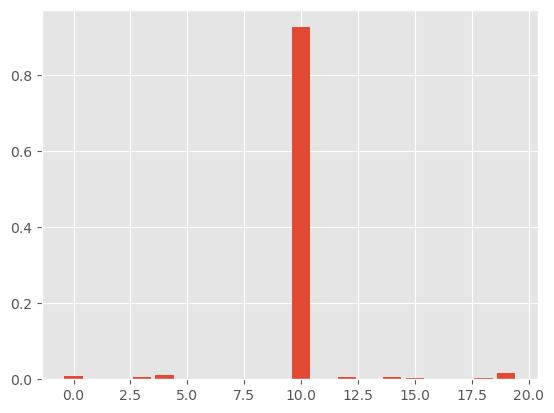

In [280]:
xgbr = XGBRegressor()
# fit the model
xgbr.fit(x_train_fold, y_train_fold)
print(xgbr.score(x_test_fold, y_test_fold))
# get importance
importance = xgbr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## 4. Case scenario:
Estimate the cost of hospitalization for Christopher, Ms. Jayna (her date of birth is 12/28/1988, height is 170 cm, and weight is 85 kgs). She lives in a tier-1 city and her state’s State ID is R1011. She lives with her partner and two children. She was found to be nondiabetic (HbA1c = 5.8). She smokes but is otherwise healthy. She has had no transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be estimated using tier-1 hospitals.

In [281]:
pred1 = rfr.predict([[1988,1,28,2,29.4,5.8,0,0,1,0,1,35,0,1,0,0,0,0,0,0]])
pred1

array([43794.4456])

In [282]:
pred2 = xgbr.predict([[1988,1,28,2,29.4,5.8,0,0,1,0,1,35,0,1,0,0,0,0,0,0]])
pred2

array([40758.58], dtype=float32)

In [283]:
pred = (pred1+pred2)/2
pred

array([42276.5118625])

## 5. Find the predicted hospitalization cost using all five models. The predicted value should be the mean of the five models' predicted values.


In [284]:
sgdr_pred = sgdr.predict(x_test_fold)
sgdr_pred

array([ 4.15599265e+04,  4.03524626e+04,  3.52022984e+04,  1.35681777e+04,
        1.04248607e+04,  8.96437409e+03,  1.21226531e+04,  1.20489886e+04,
        3.45968808e+04,  8.68853758e+03,  1.28556305e+04,  9.43746771e+03,
        9.01933549e+03,  9.96592602e+03,  9.05638388e+03,  9.86202829e+03,
        1.36320298e+04,  1.15144736e+04,  9.36062279e+03,  9.59147560e+03,
        1.04294342e+04,  1.21373049e+04,  9.37821978e+03,  1.25684278e+04,
        8.95310521e+03,  1.39256679e+04,  9.65741210e+03,  3.81592406e+04,
        1.04743870e+04,  1.03256446e+04,  9.55914847e+03,  1.11537955e+04,
        8.91724779e+03,  1.25624657e+04,  1.12426793e+04,  9.49827326e+03,
        1.32440900e+04,  1.26014716e+04,  1.31849858e+04,  1.02590156e+04,
        1.02623745e+04,  1.33303033e+04,  1.13357159e+04,  3.68600948e+04,
        1.01050035e+04,  9.58627680e+03,  9.21388428e+03,  1.31078102e+04,
        9.72480552e+03,  9.21526896e+03,  9.05073759e+03,  9.34175448e+03,
        9.04168242e+03,  

In [285]:
rfr_pred = rfr.predict(x_test_fold)
rfr_pred

array([45630.9084, 40151.4206, 40701.6006, 11789.8432, 12712.0312,
       11617.0562, 11585.3956, 11852.8446, 36181.9693, 10106.469 ,
       12052.4294, 11698.936 , 10587.7291, 12233.3669, 10798.9663,
       12113.3206, 11492.4099, 10499.5629, 10518.6139, 12296.4866,
       11155.7518, 11150.5483, 10836.9911, 11197.7056, 10819.2741,
       12012.9615, 12559.2199, 39426.4116, 10866.4002, 10719.0239,
        9641.7092, 10010.3254, 11369.2271, 12157.782 , 11522.0698,
       11430.1432,  9831.0059, 12161.4335, 12993.3544, 11193.6249,
        9627.8291, 19291.5357, 16576.4506, 39661.612 , 10504.6151,
       11876.1931,  9753.8524, 11510.0481,  8823.7466, 17325.7939,
        7658.515 ,  9135.1923, 18038.1834,  9787.4345, 10053.2156,
       39297.7632, 10413.4445,  9552.4831, 39074.4968,  9698.4858,
       38396.3437,  9794.9372, 10055.9516, 11795.6069, 11943.5187,
        9285.6206,  7819.1405,  6564.3618,  8734.3599,  8034.2995,
        8613.7105, 10578.3865,  8574.6198,  9549.8598,  9142.4

In [286]:
xgbr_pred = xgbr.predict(x_test_fold)
xgbr_pred

array([4.39005391e+04, 4.14349336e+04, 3.94802891e+04, 1.14220723e+04,
       1.55455596e+04, 9.02527051e+03, 1.18566387e+04, 1.36344990e+04,
       3.42247148e+04, 1.17147686e+04, 1.09263154e+04, 1.07219658e+04,
       1.23534053e+04, 1.47896260e+04, 9.92747363e+03, 1.16125000e+04,
       1.02496729e+04, 9.44928809e+03, 1.01956572e+04, 1.38822949e+04,
       1.19761348e+04, 1.12390195e+04, 1.07860059e+04, 9.10897852e+03,
       1.20858730e+04, 1.05048516e+04, 1.37382236e+04, 3.90493398e+04,
       1.38485986e+04, 1.04008809e+04, 8.65425488e+03, 9.94126074e+03,
       1.18862969e+04, 1.03975947e+04, 1.01479385e+04, 1.12865029e+04,
       9.17809180e+03, 1.06551357e+04, 1.16749678e+04, 1.18775566e+04,
       1.21973994e+04, 1.73604160e+04, 1.35655498e+04, 3.96313789e+04,
       1.04213555e+04, 1.34059180e+04, 9.38225879e+03, 1.05686172e+04,
       8.39797070e+03, 1.50900410e+04, 8.42165723e+03, 9.87333203e+03,
       1.53317373e+04, 8.98328418e+03, 9.95097852e+03, 3.97799961e+04,
      

In [287]:
final_pred = (sgdr_pred+rfr_pred+xgbr_pred)/3
final_pred

array([43697.12466177, 40646.27225776, 38461.39602983, 12260.03104392,
       12894.15048164,  9868.90026523, 11854.89579186, 12512.11073264,
       35001.18830241, 10169.92504568, 11944.79178305, 10619.45651145,
       10653.48995448, 12329.63963206,  9927.60793801, 11195.94962982,
       11791.37083923, 10487.77485074, 10024.96463744, 11923.41904095,
       11187.10692173, 11508.95758747, 10333.73891308, 10958.3706513 ,
       10619.41745223, 12147.82698701, 11984.95187769, 38878.33068239,
       11729.79527108, 10481.8497987 ,  9285.03751616, 10368.46055928,
       10724.25725596, 11705.9474763 , 10970.8958435 , 10738.30646292,
       10751.06255201, 11806.01359979, 12617.76932702, 11110.06570888,
       10695.86767283, 16660.75167271, 13825.90542907, 38717.69523057,
       10343.65802053, 11622.79595652,  9449.99848866, 11728.82516596,
        8982.17427445, 13877.03462597,  8376.96993903,  9450.09293867,
       14137.20104009,  9247.69897441, 10251.56159515, 38534.89163372,
      